In [4]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV # Added RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


train_path = "/content/drive/My Drive/BinaryClassification/train_dataset.csv"

train_df = pd.read_csv(train_path)

target = "smoking"

# Split into X & y
X = train_df.drop(columns=[target])
y = train_df[target]

# Split the training data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


def evaluate_model(model_name, y_true, y_pred):
    print(f"\n===================== {model_name} =====================")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

Mounted at /content/drive


In [ ]:
print("1. Dimensions of the train_df DataFrame:")
print(train_df.shape)

print("\n2. Concise summary of the train_df DataFrame (info()):")
train_df.info()

print("\n3. Count of missing values for each column in train_df:")
print(train_df.isnull().sum())

print("\n4. Descriptive statistics for numerical columns in train_df:")
print(train_df.describe())

print("\n5. Descriptive statistics for categorical columns in train_df:")
object_columns = train_df.select_dtypes(include='object')
if not object_columns.empty:
    print(object_columns.describe())
else:
    print("No columns with 'object' dtype found in the DataFrame.")

1. Dimensions of the train_df DataFrame:
(38984, 23)

2. Concise summary of the train_df DataFrame (info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 

/tmp/ipython-input-3590001172.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking', data=train_df, palette='viridis')


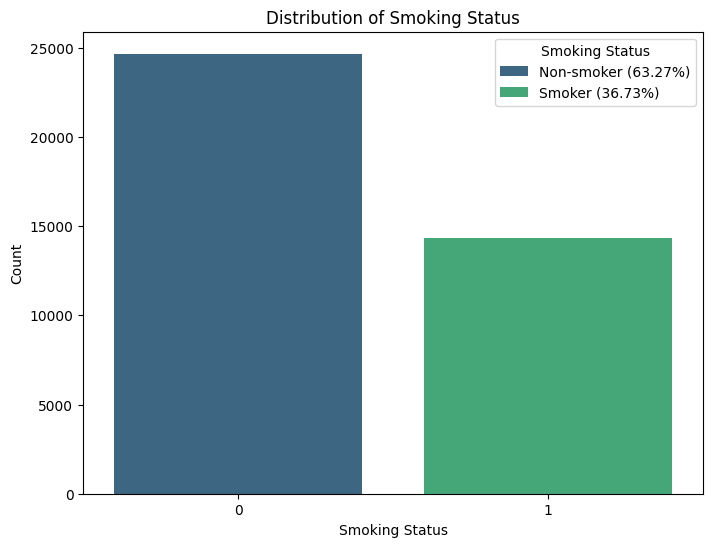

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='smoking', data=train_df, palette='viridis')

total = len(train_df['smoking'])
counts = train_df['smoking'].value_counts()
percentage_0 = (counts[0] / total) * 100
percentage_1 = (counts[1] / total) * 100

plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')

plt.legend(title='Smoking Status', labels=[f'Non-smoker ({percentage_0:.2f}%)', f'Smoker ({percentage_1:.2f}%)'])

plt.show()

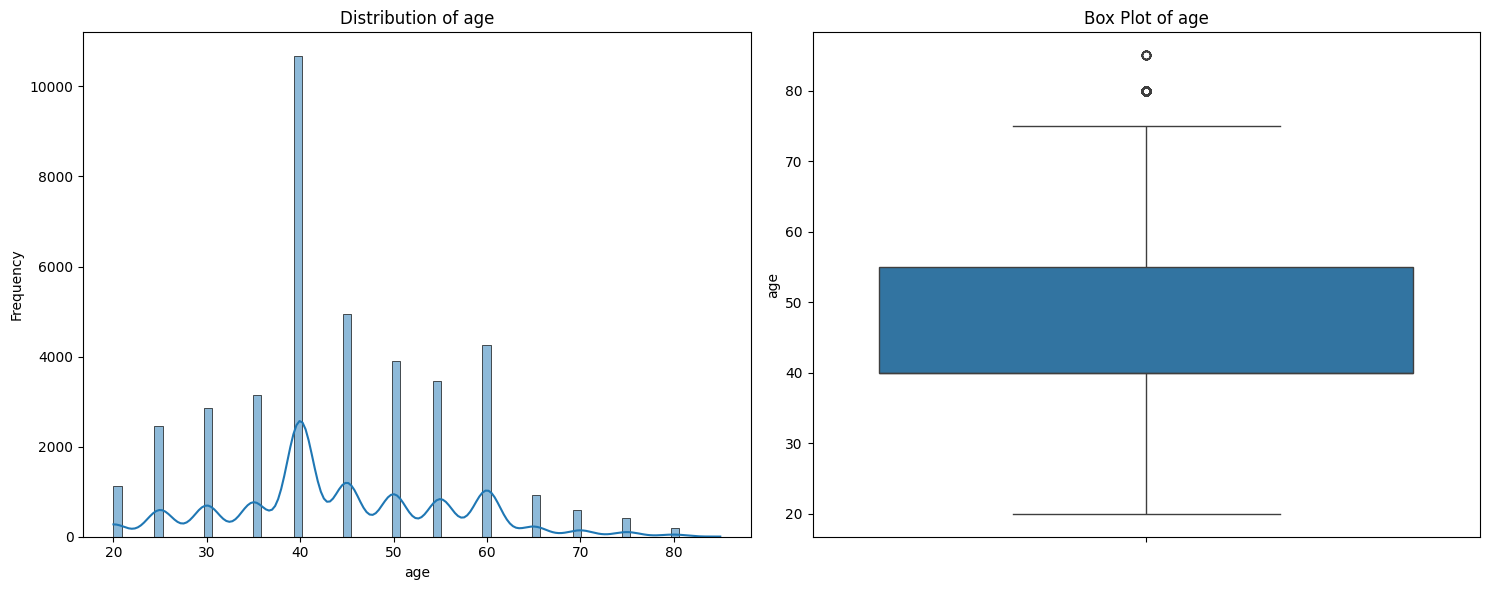

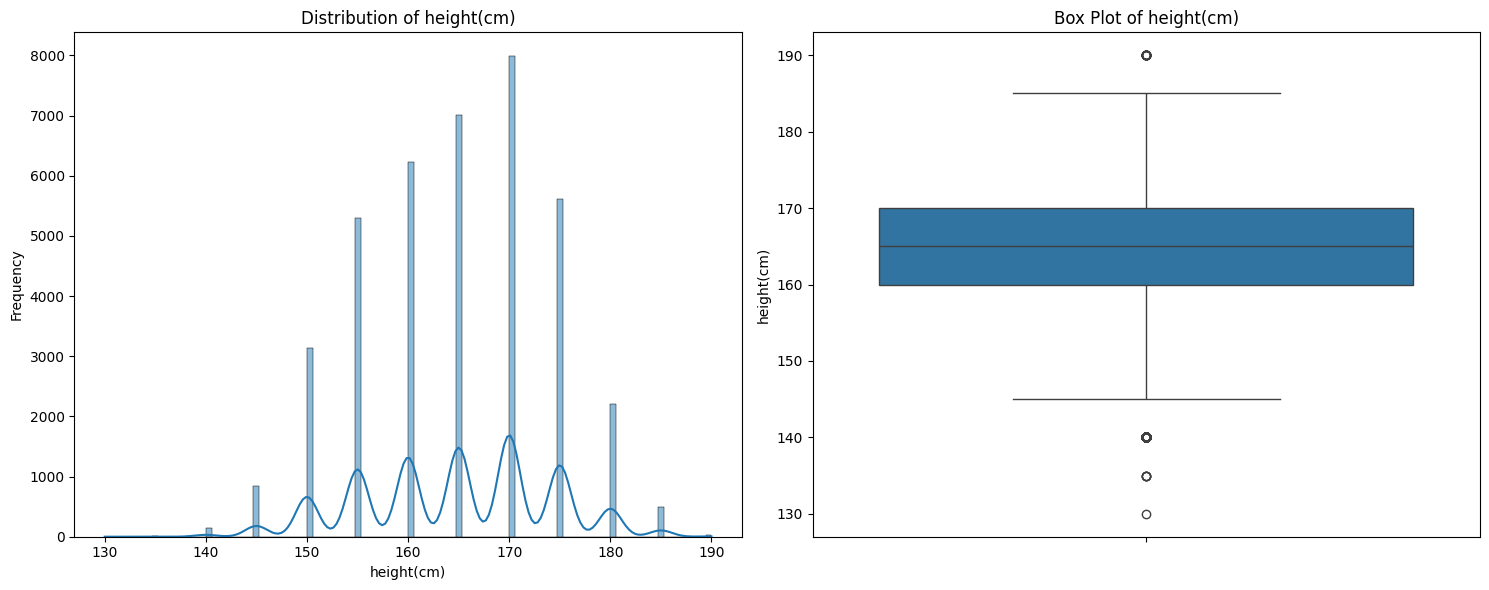

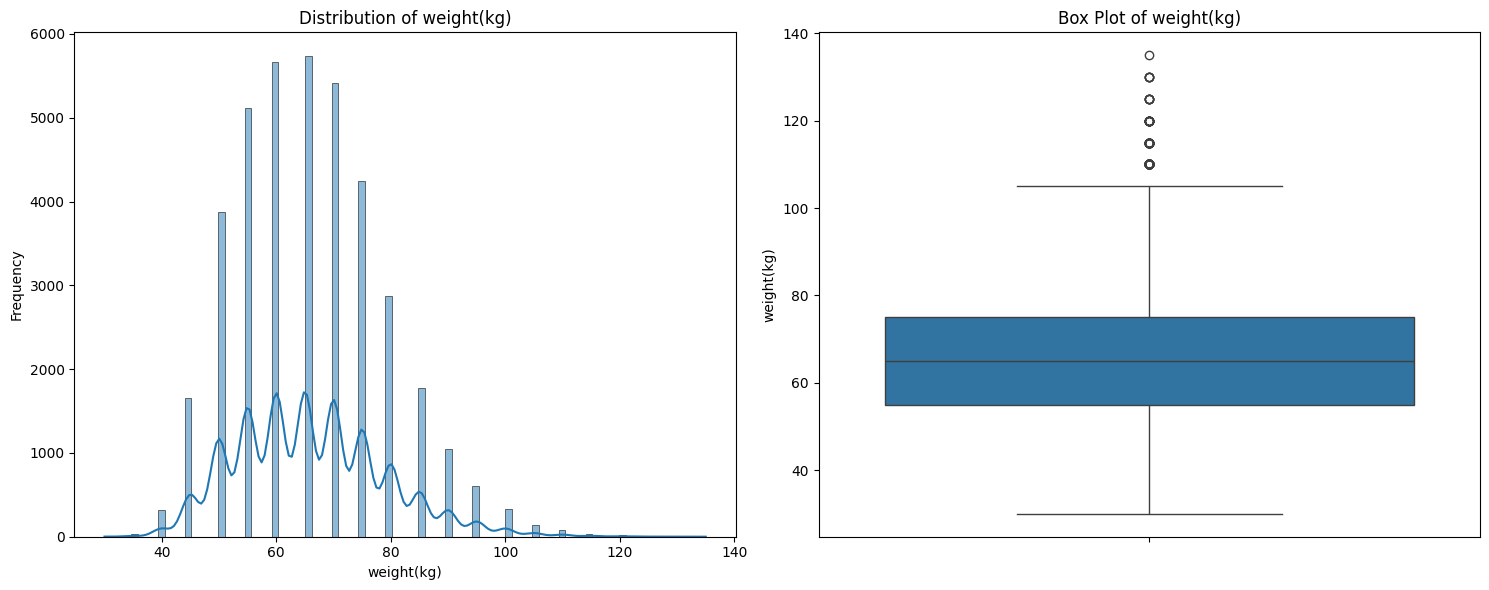

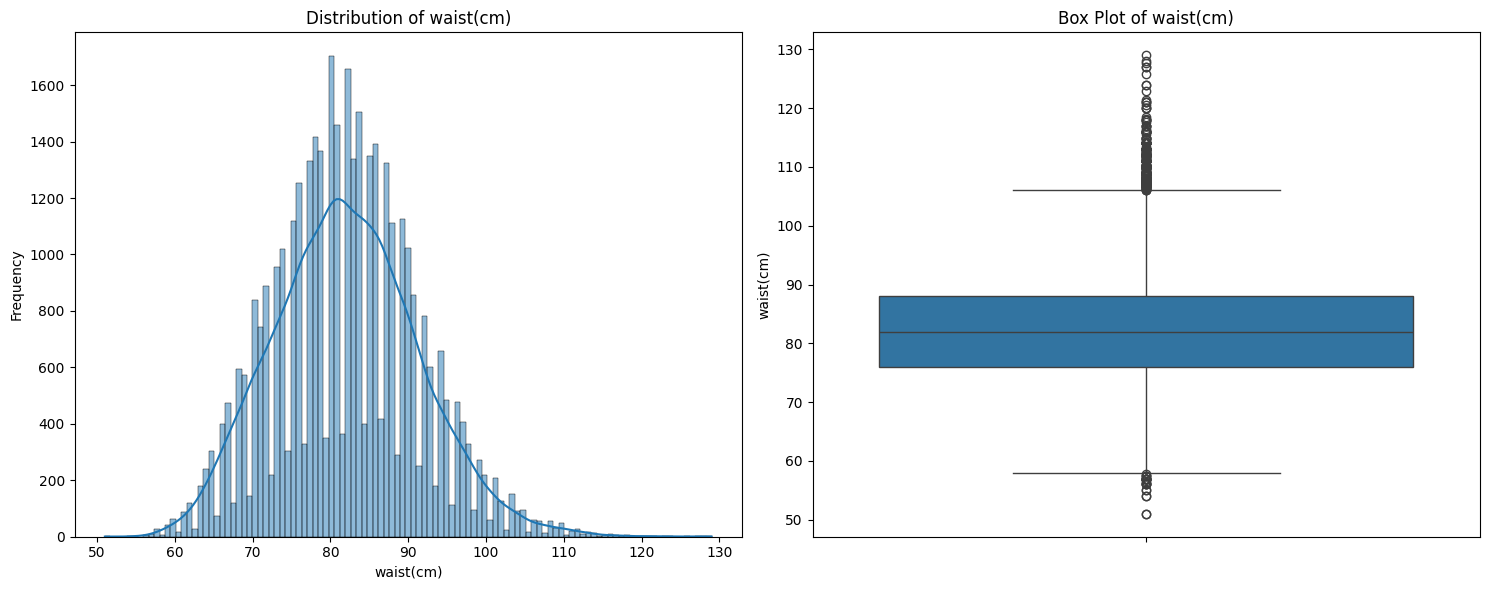

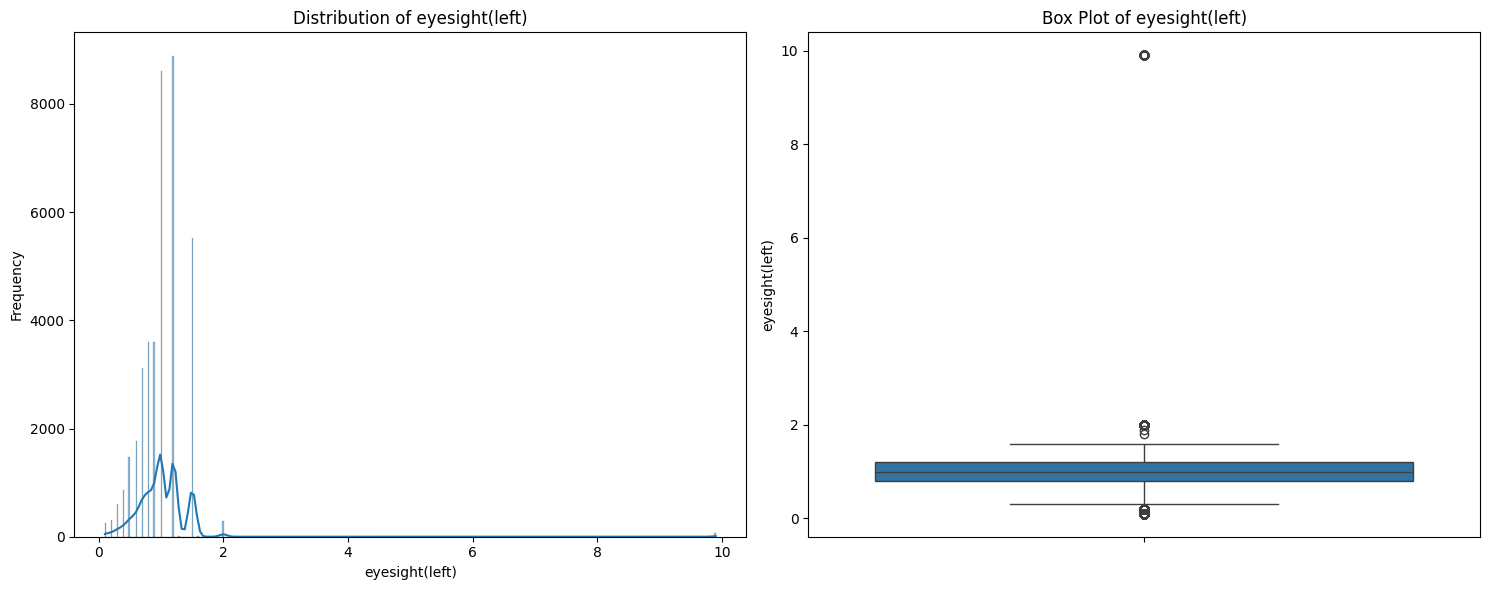

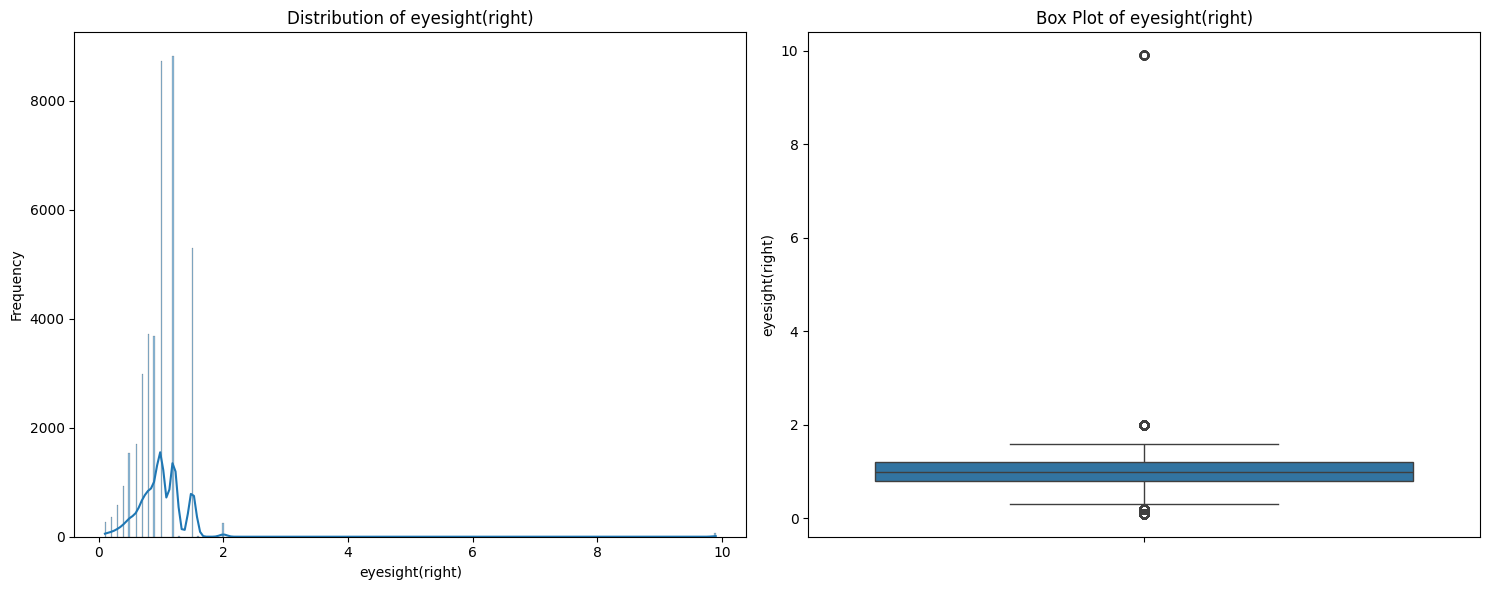

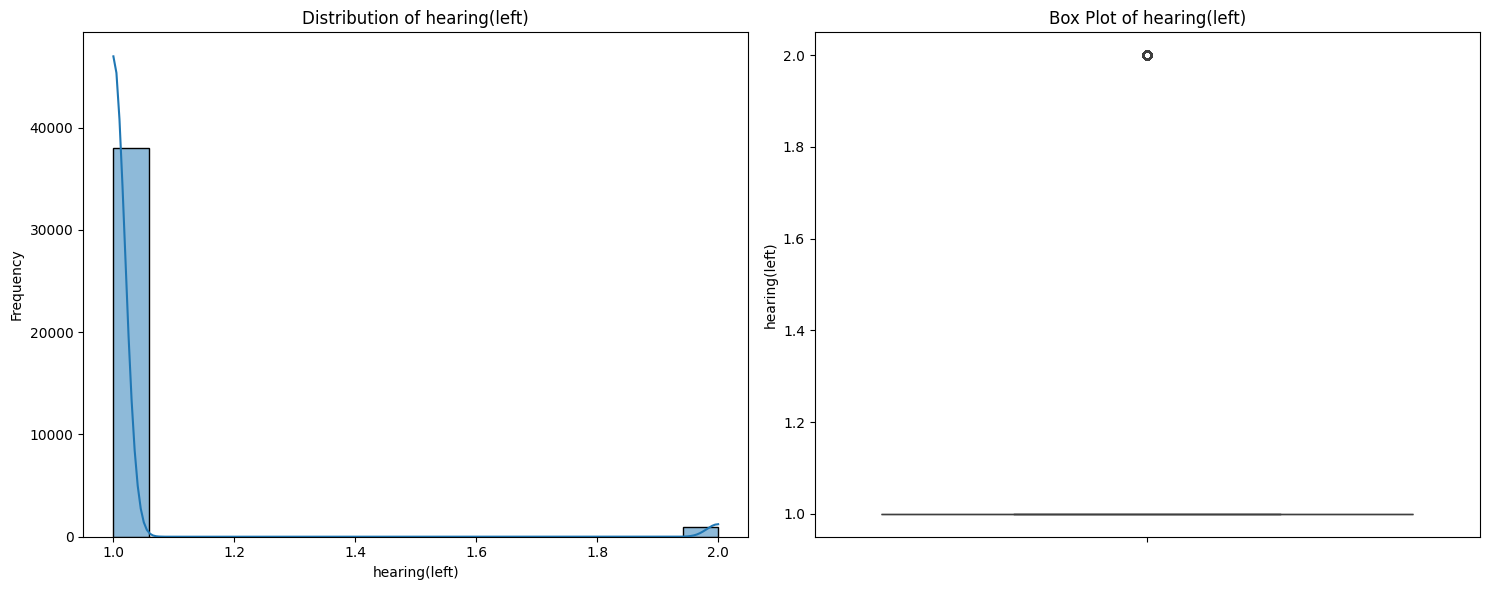

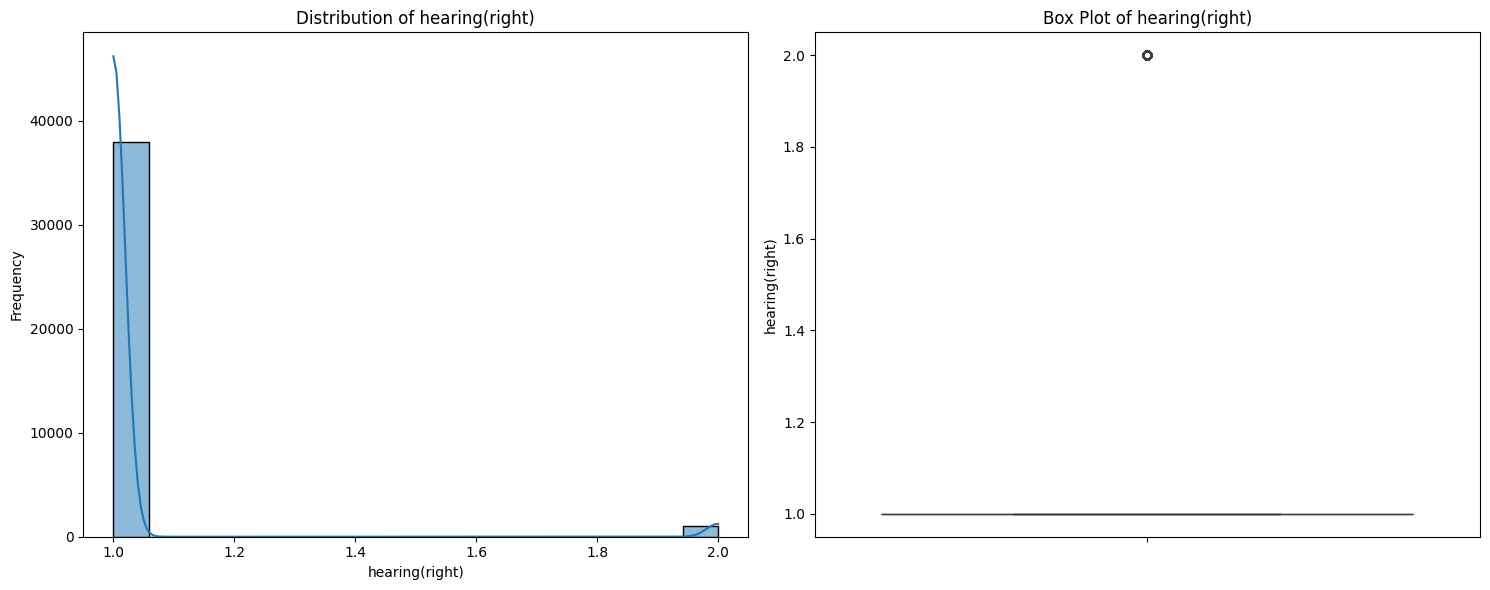

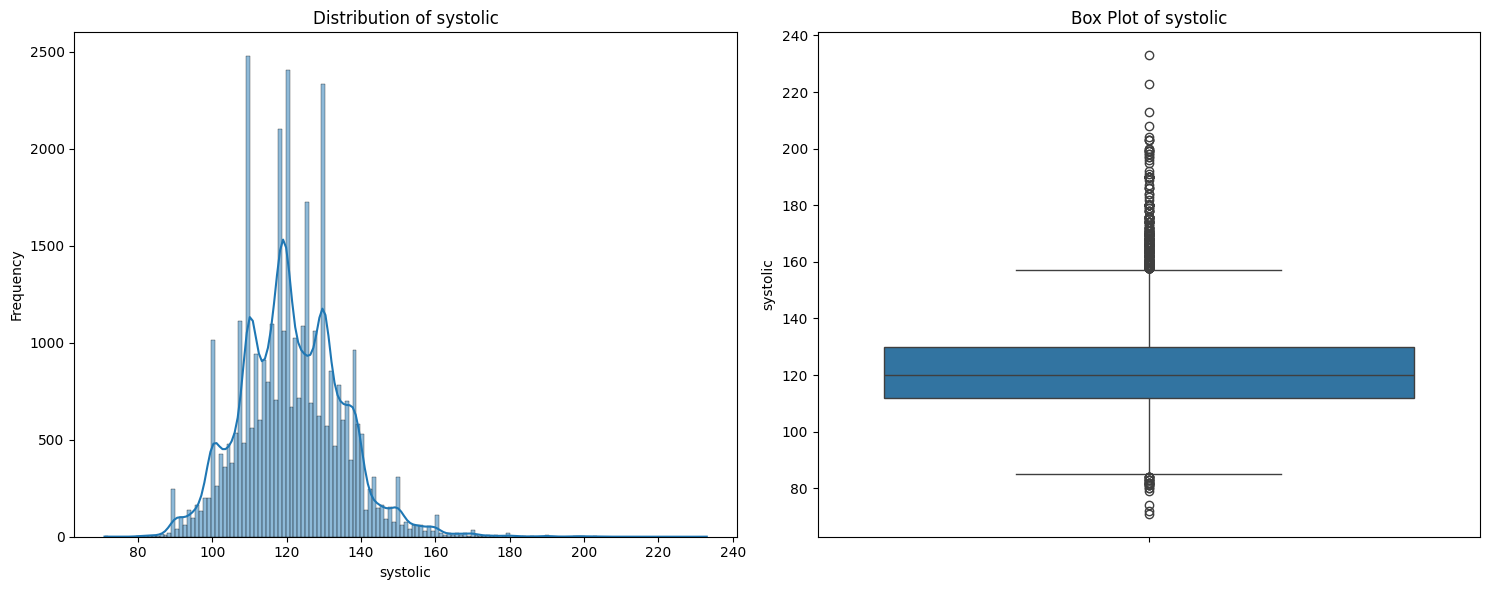

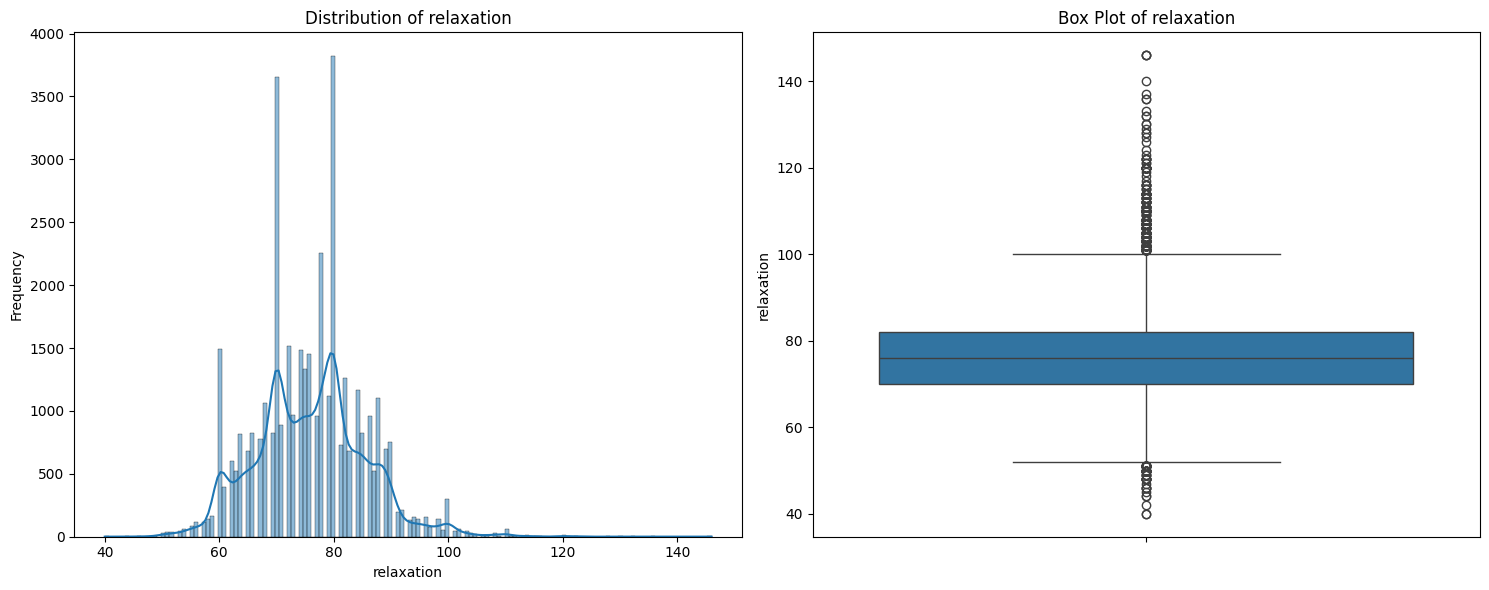

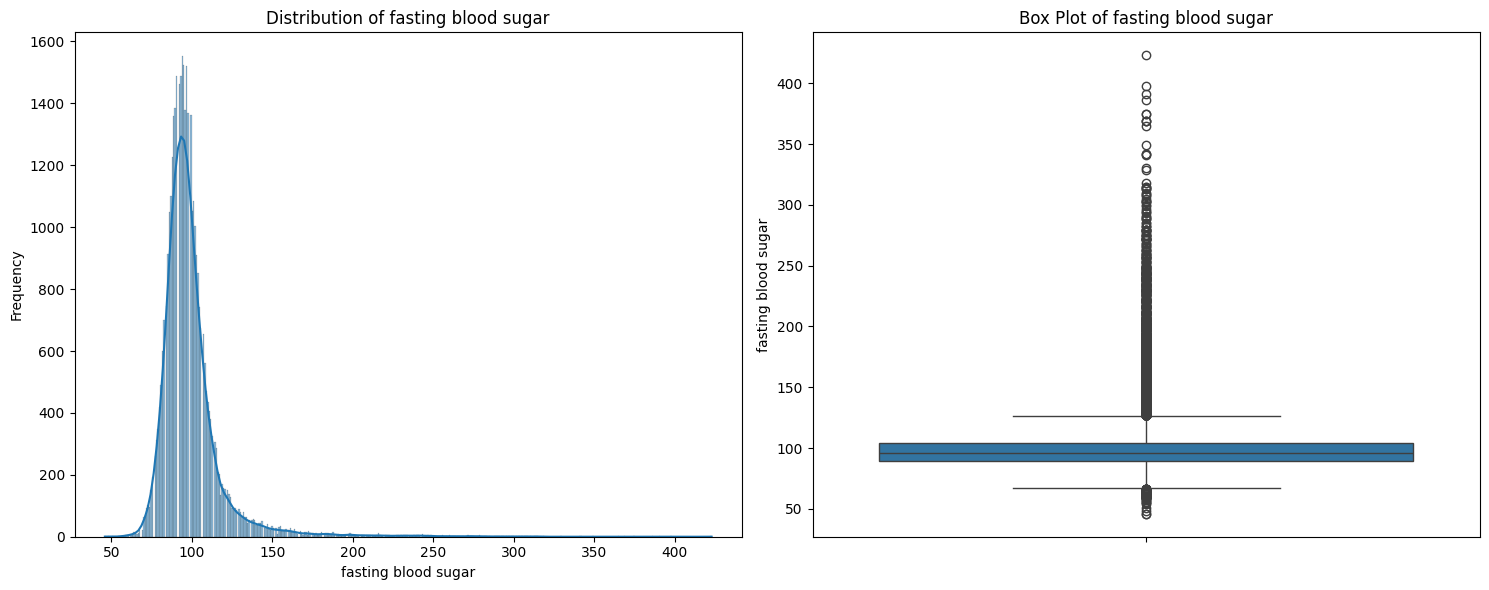

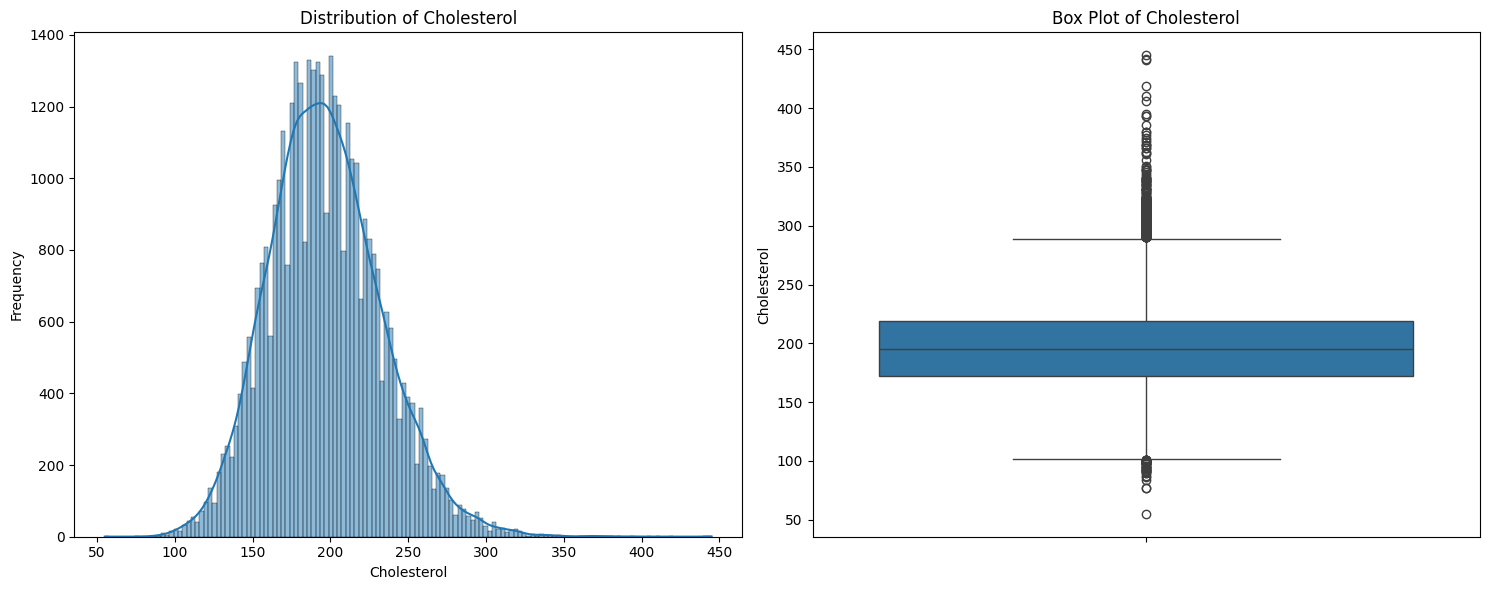

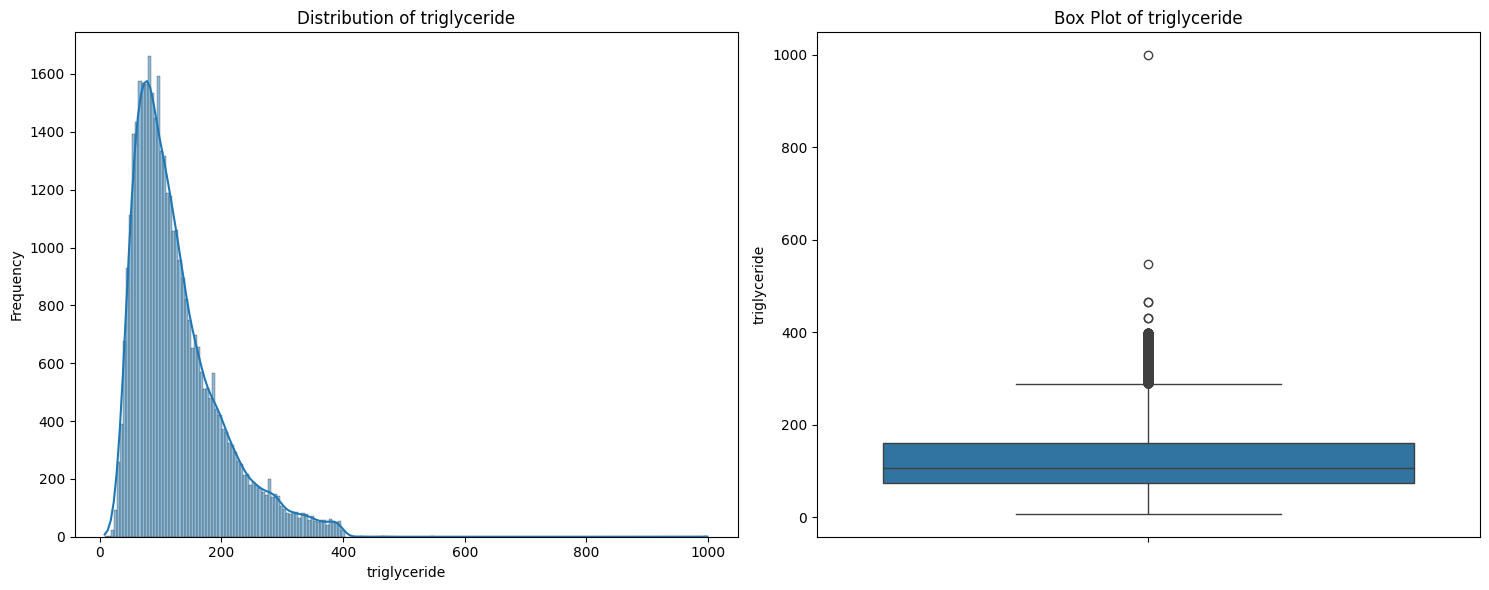

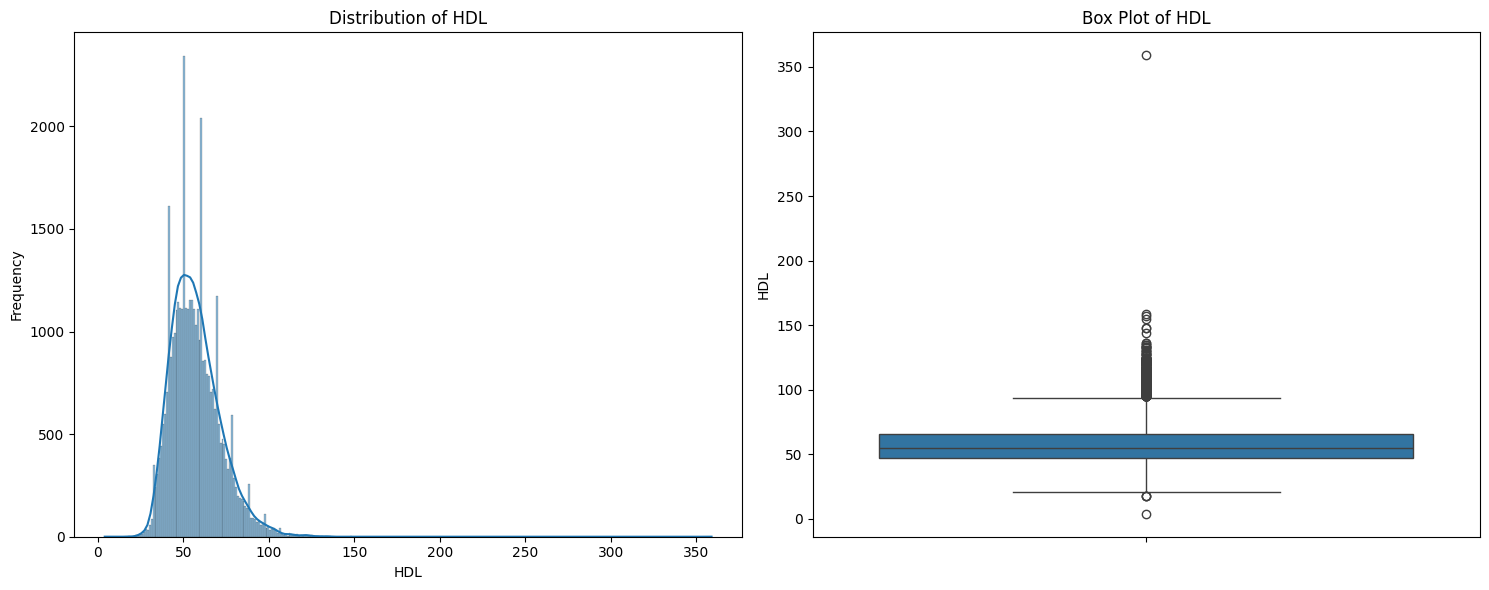

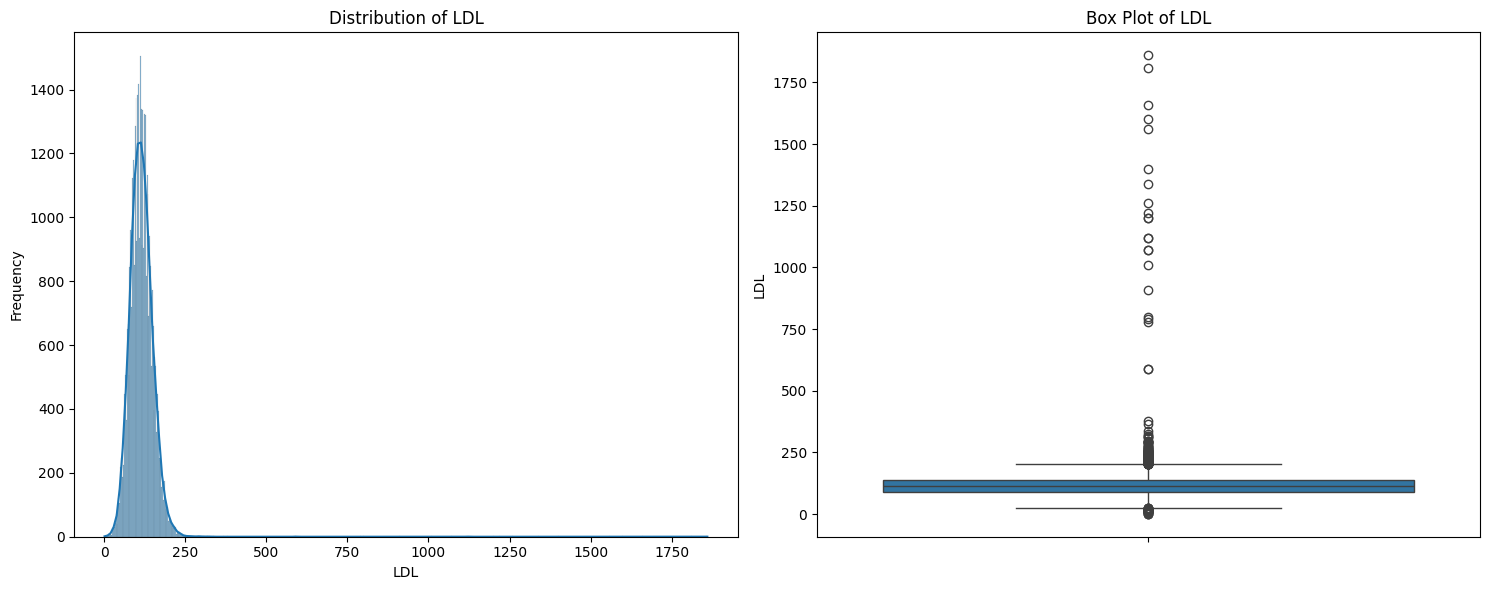

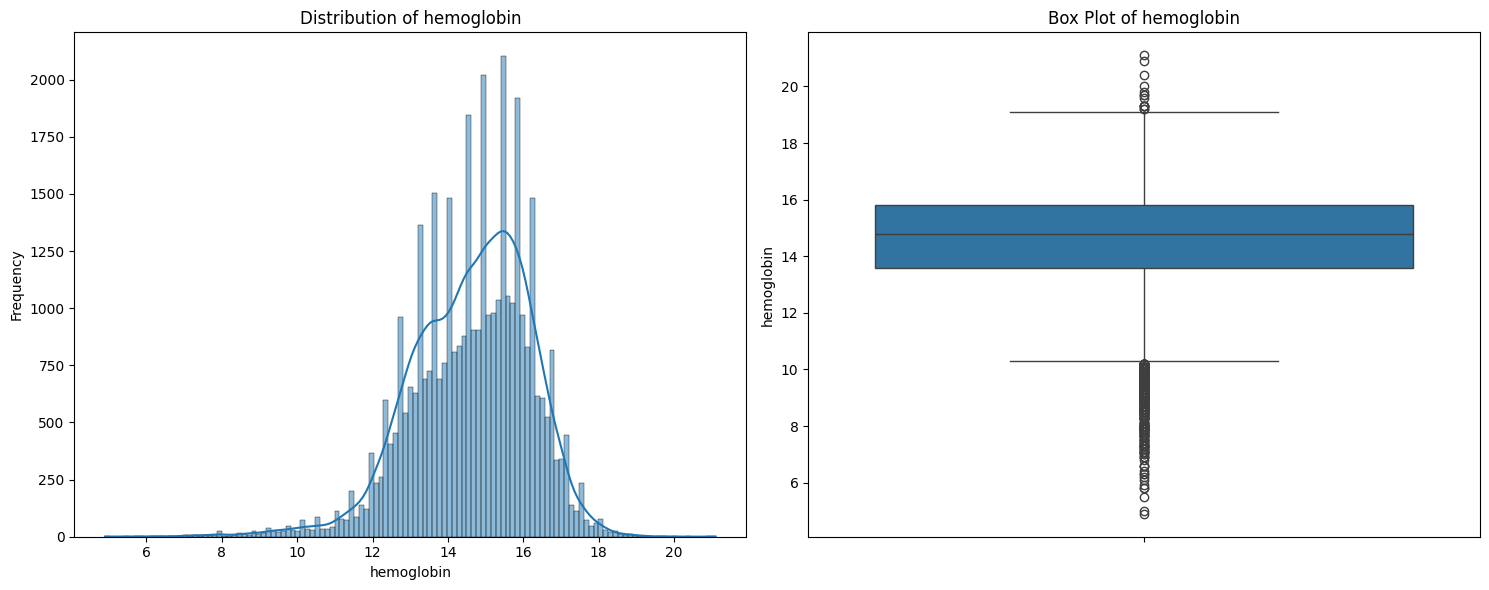

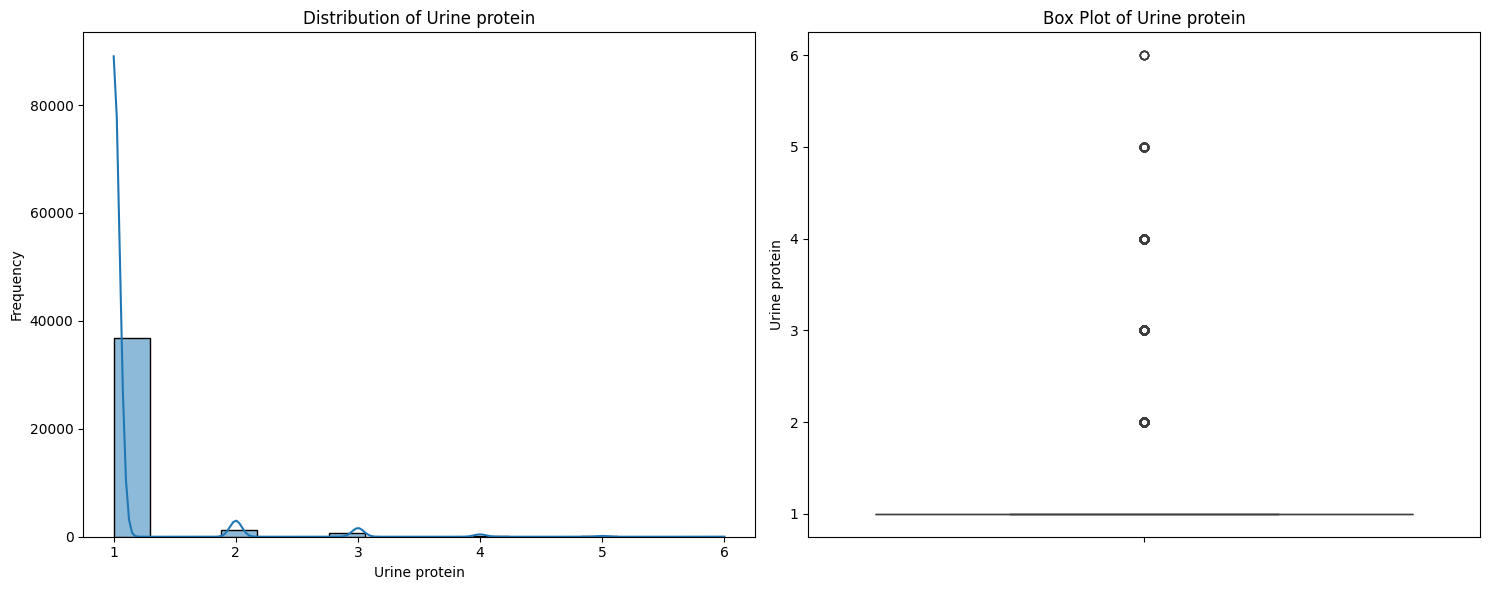

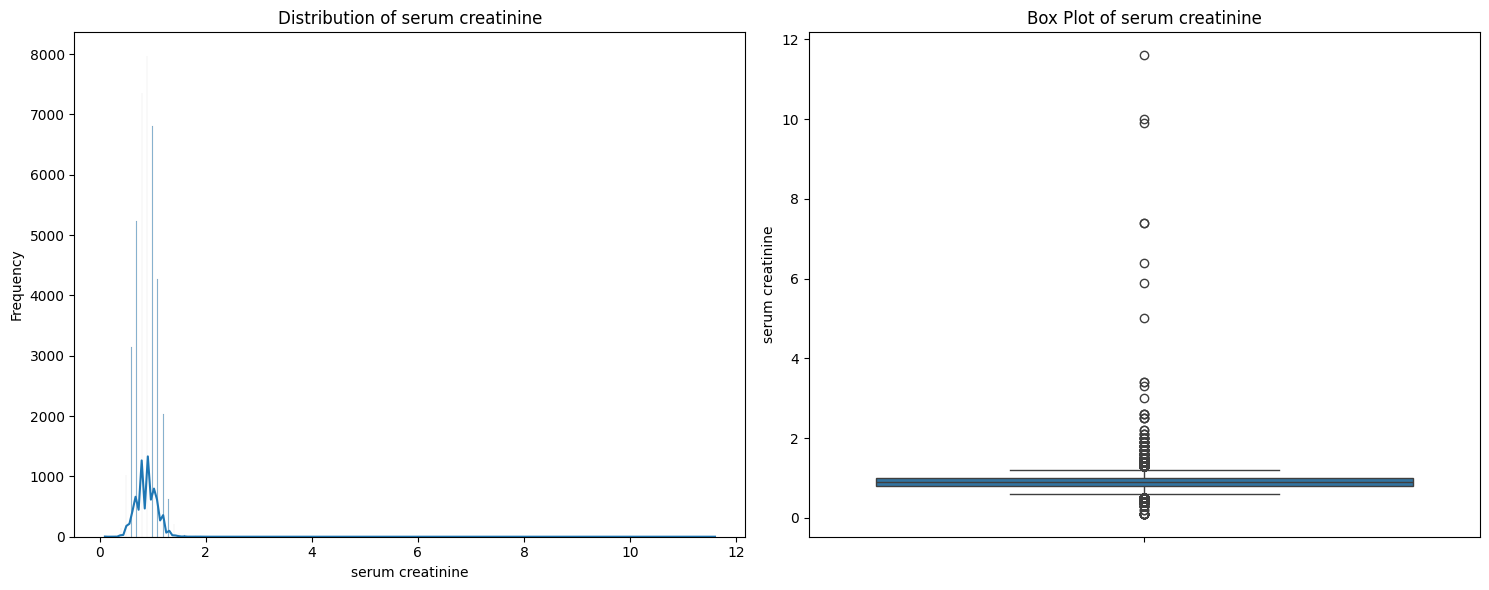

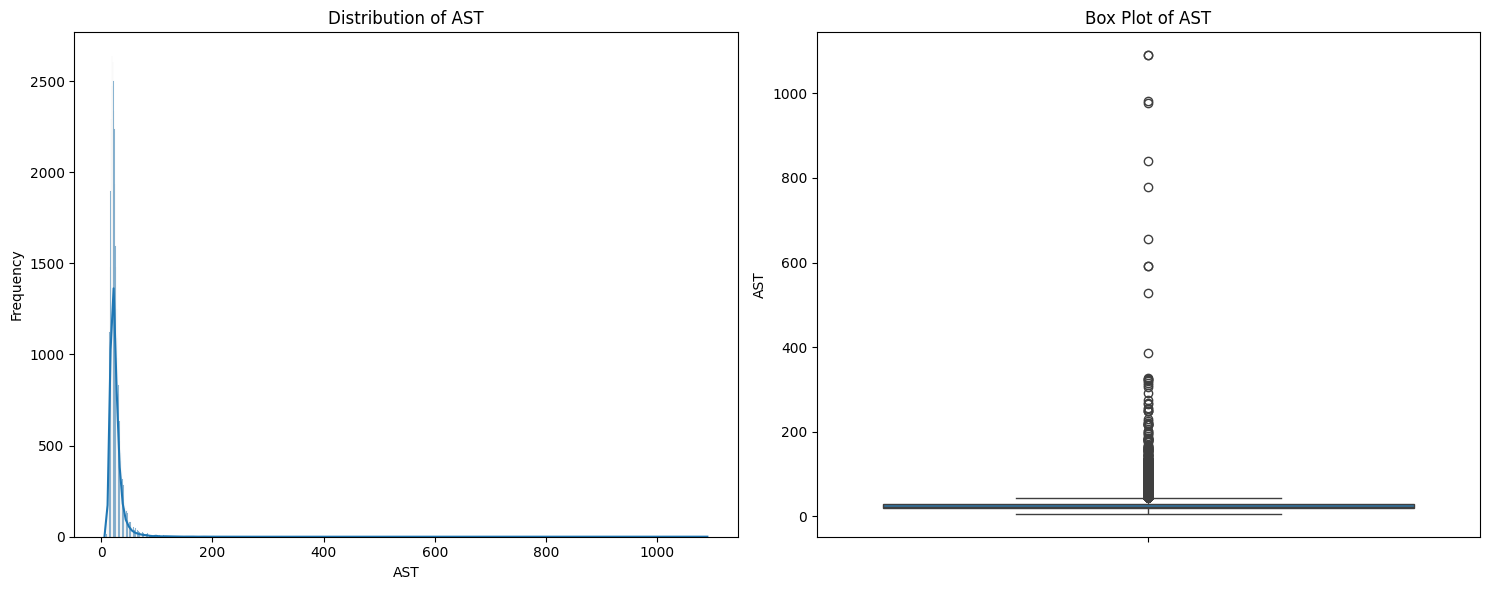

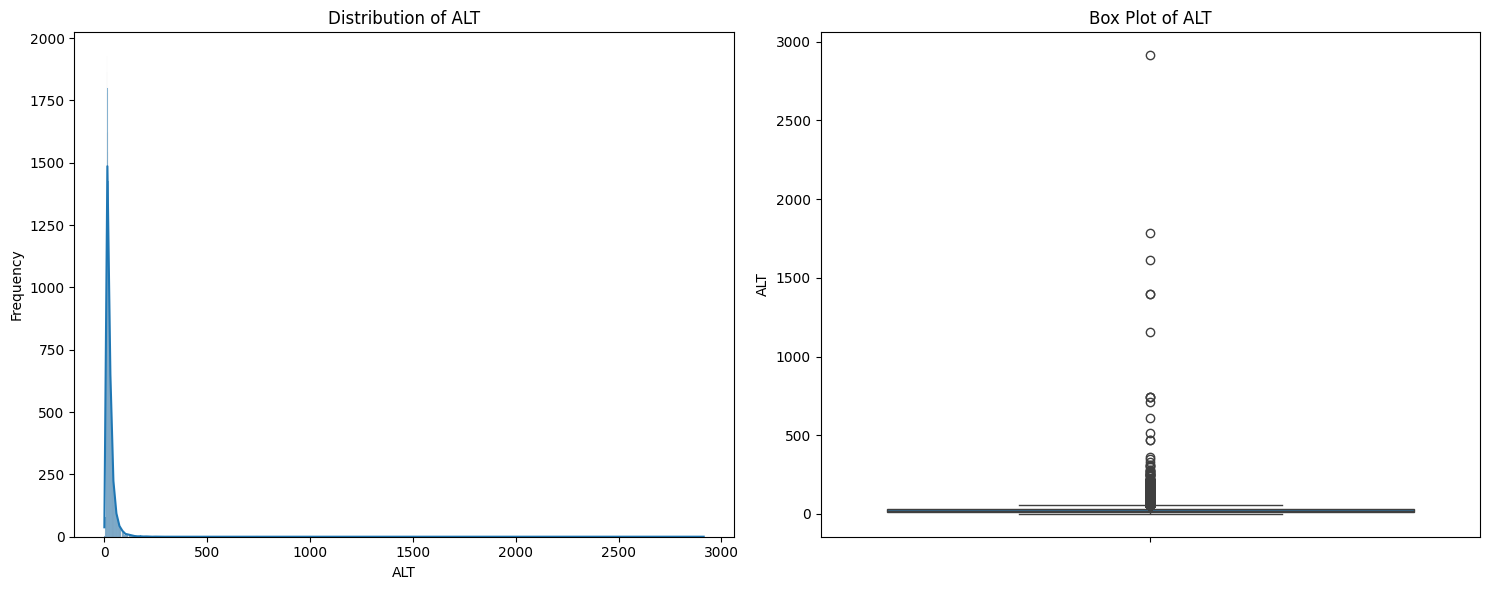

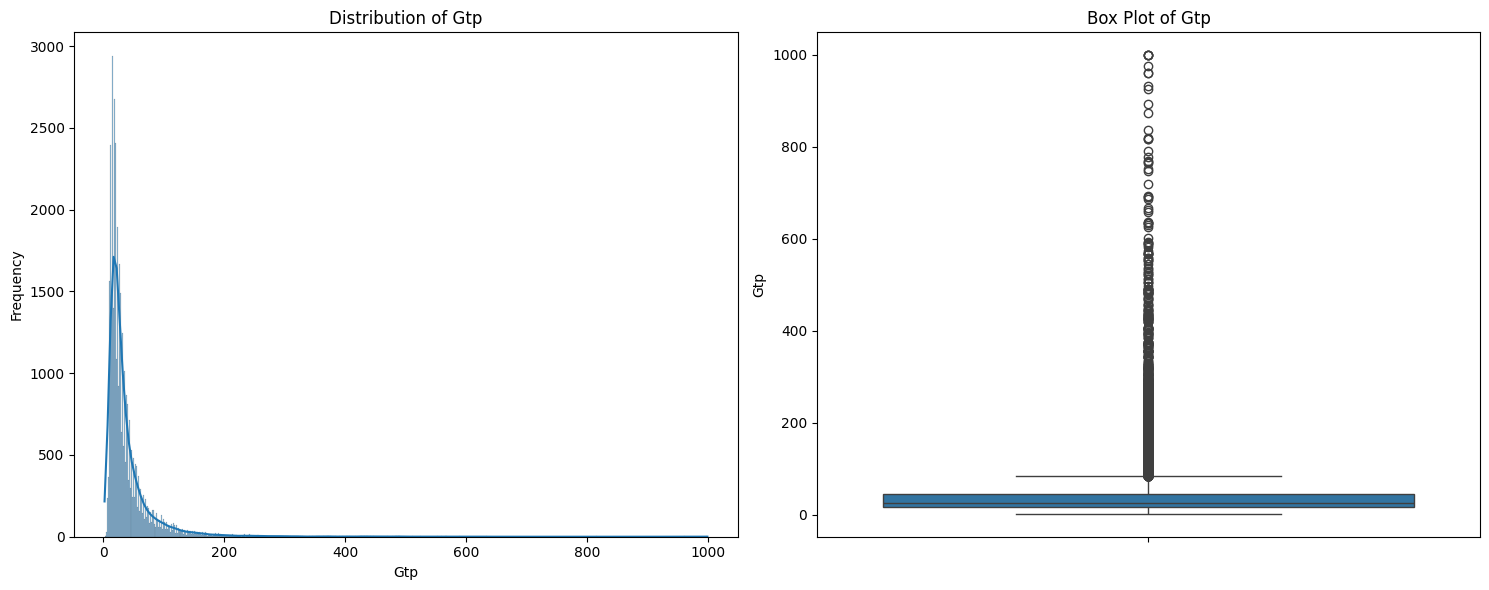

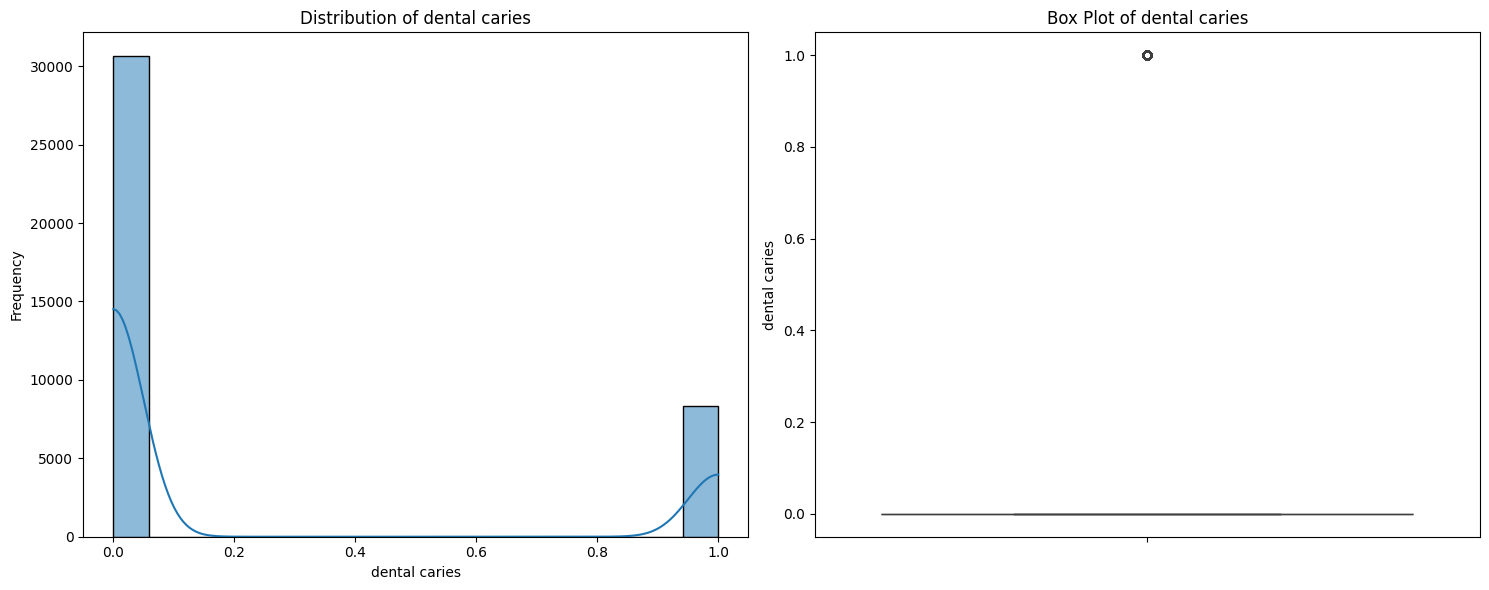

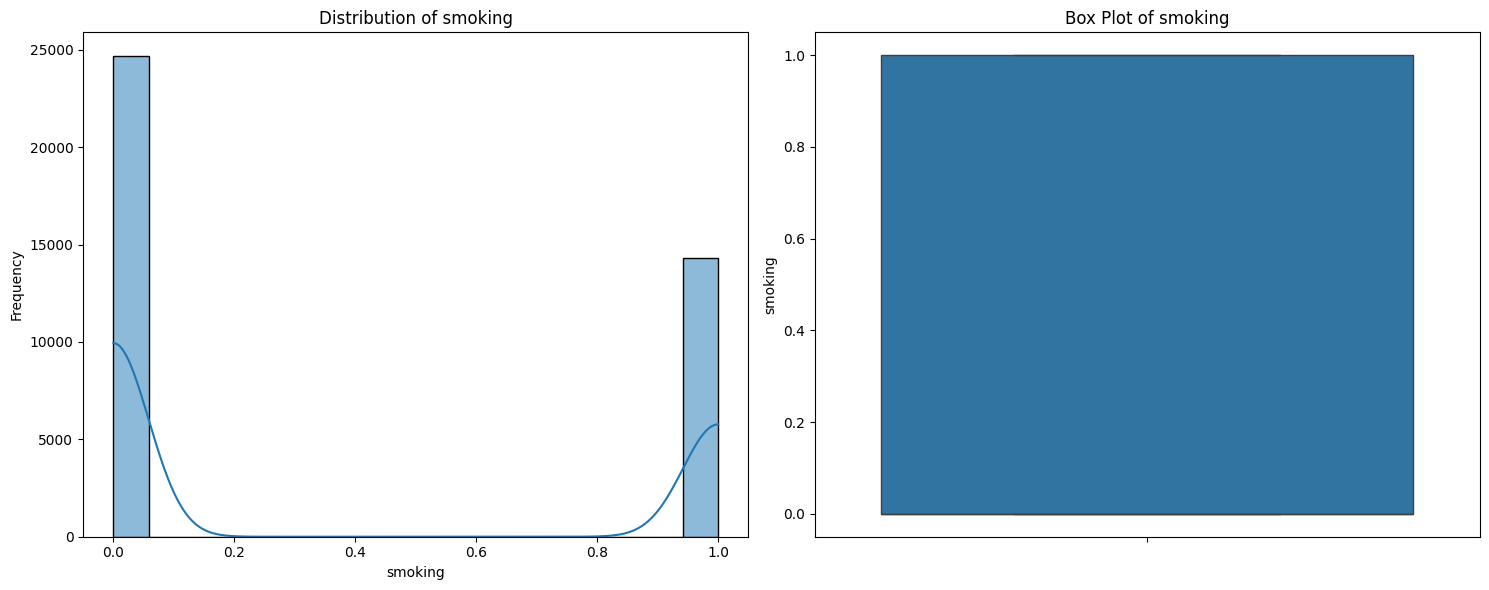

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_cols:
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(train_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=train_df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

    plt.tight_layout()
    plt.show()

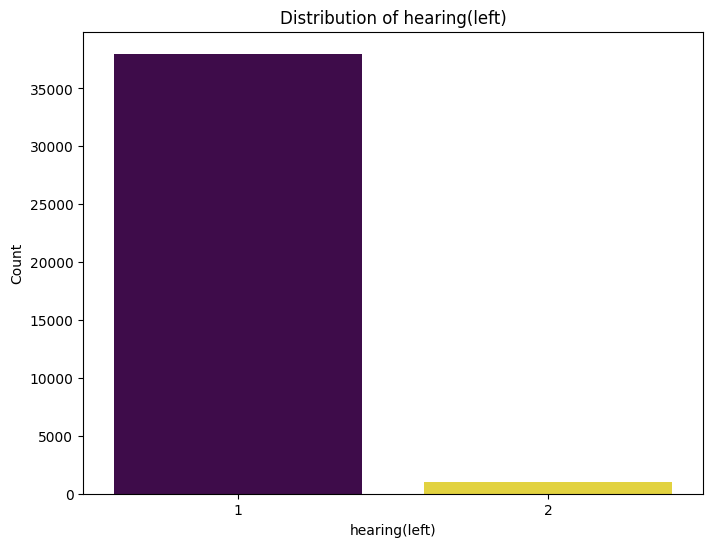

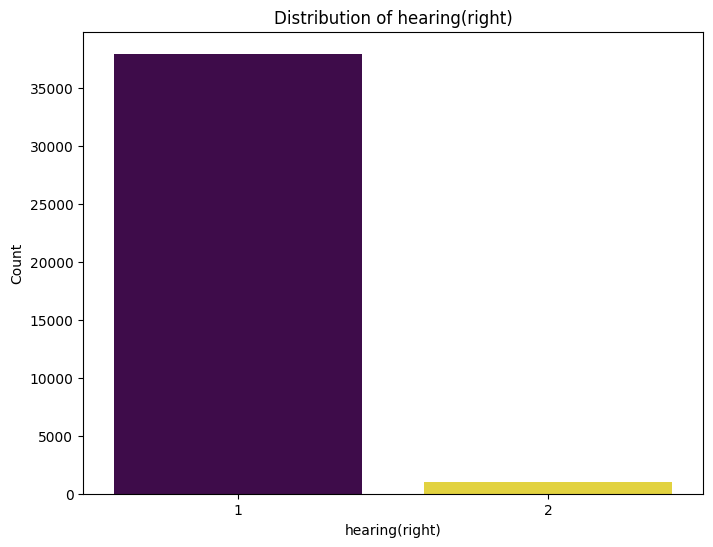

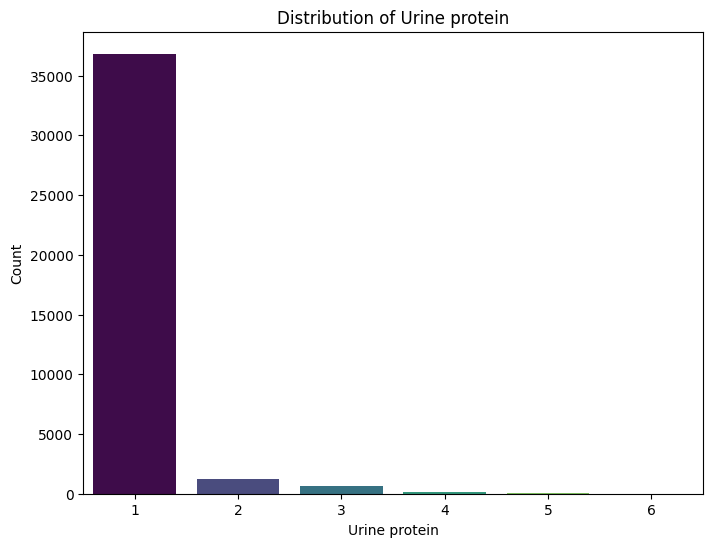

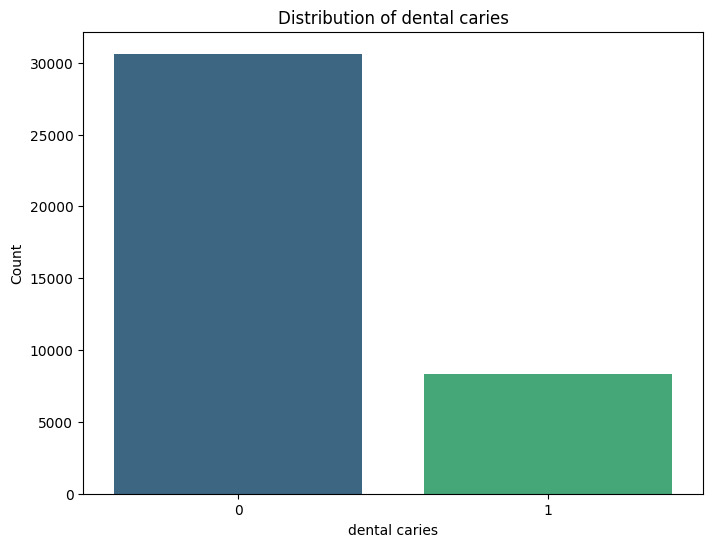

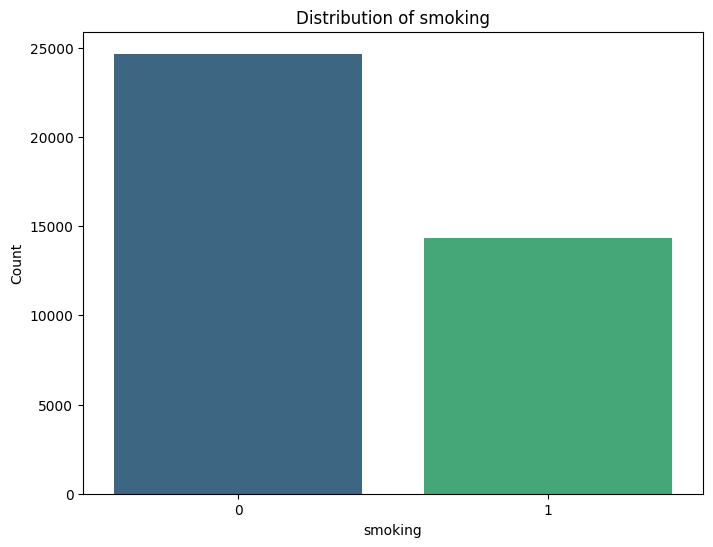

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols_encoded = ['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries', 'smoking']

for column in categorical_cols_encoded:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=train_df, palette='viridis', hue=column, legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

Generating box plots for numerical features vs. smoking status...


/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


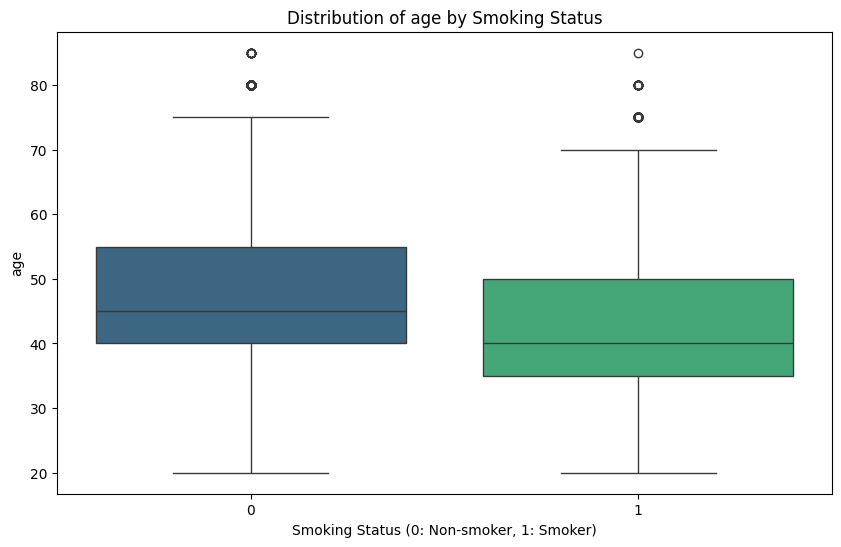

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


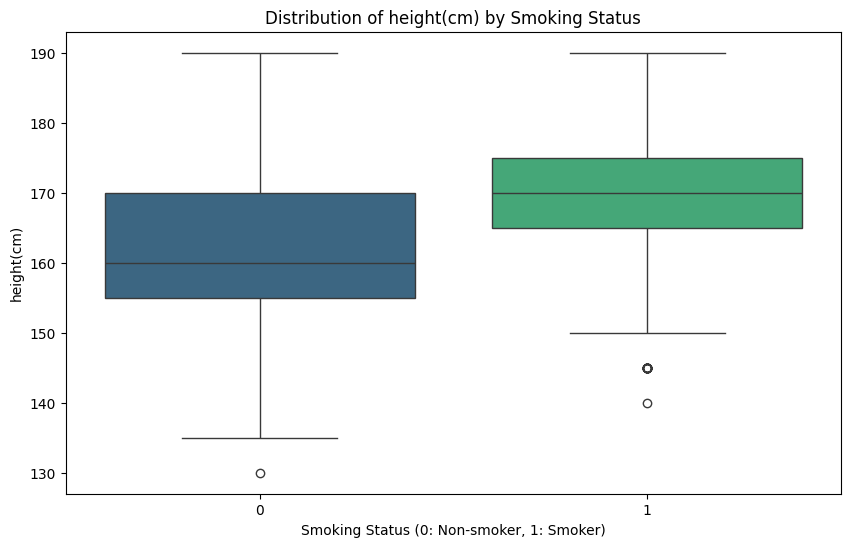

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


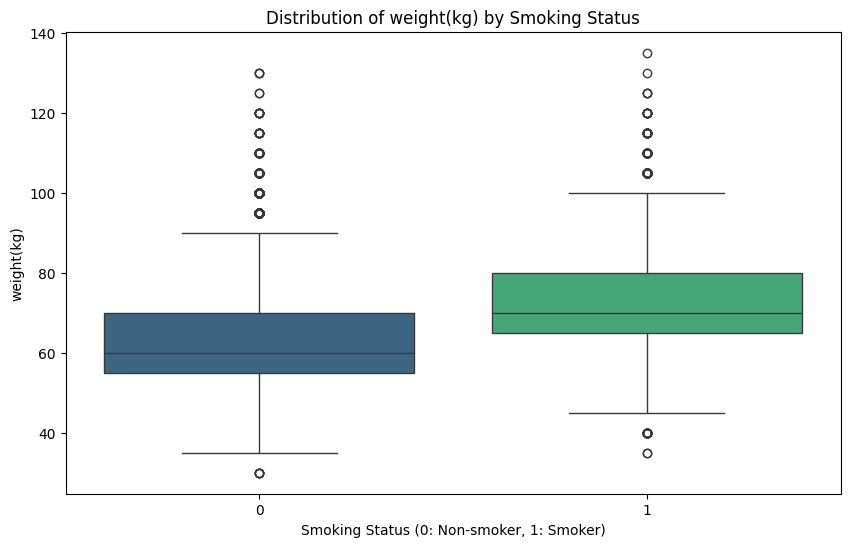

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


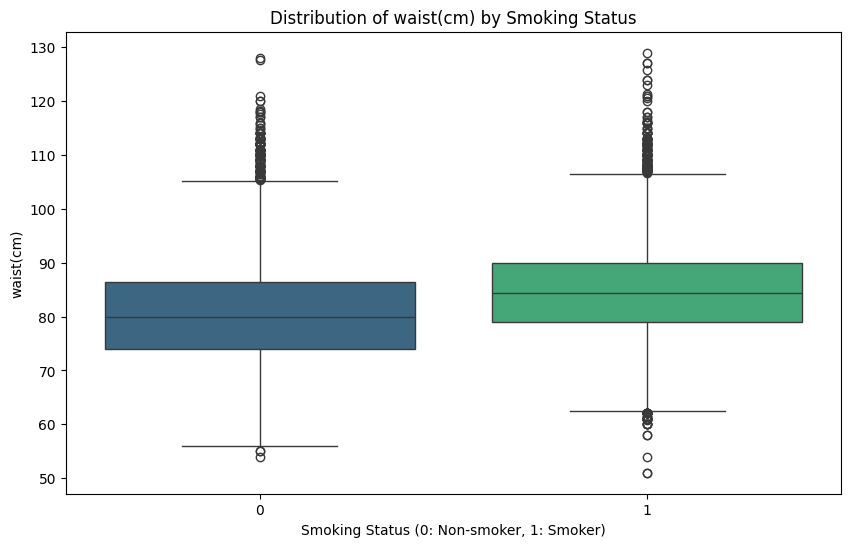

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


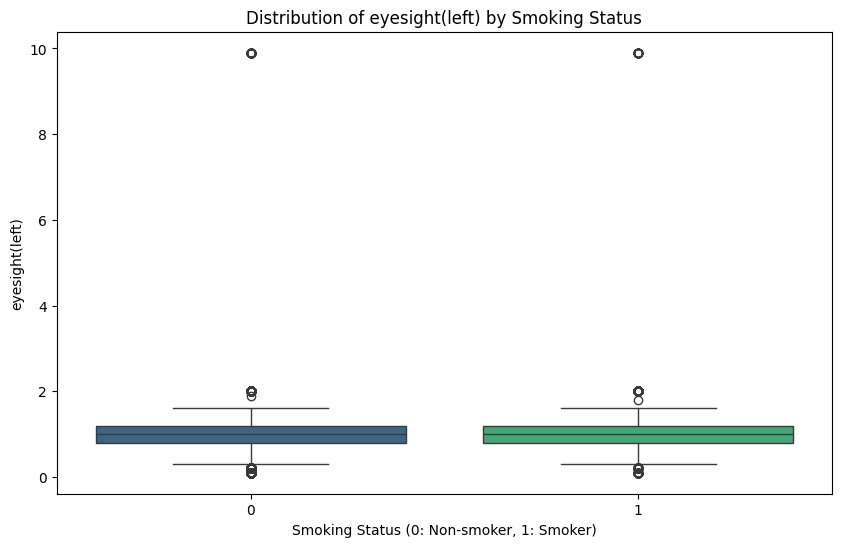

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


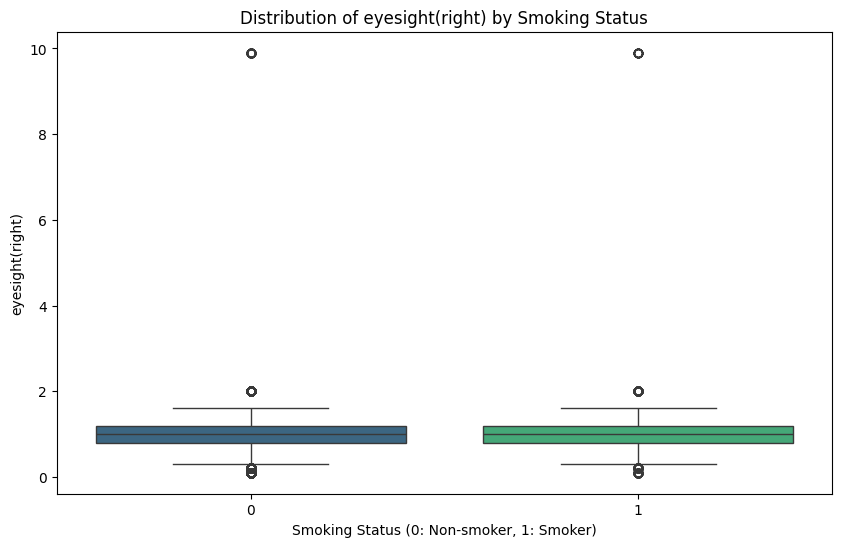

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


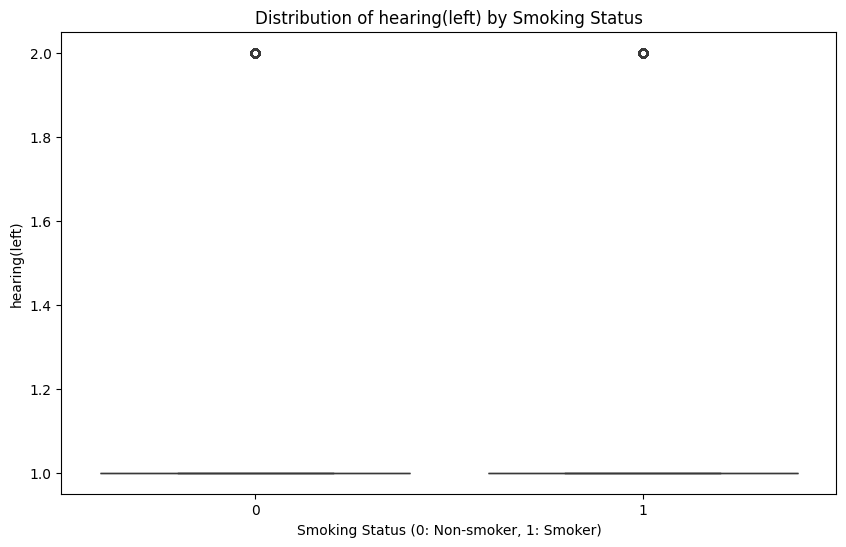

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


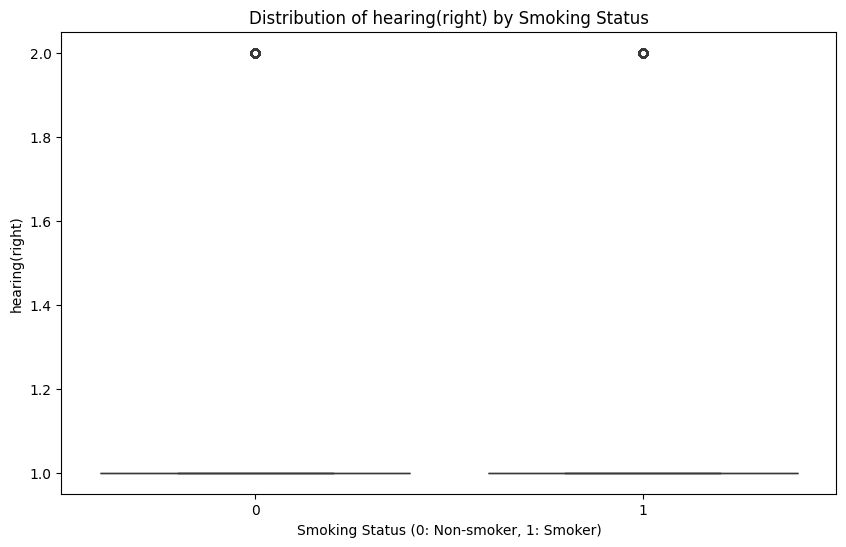

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


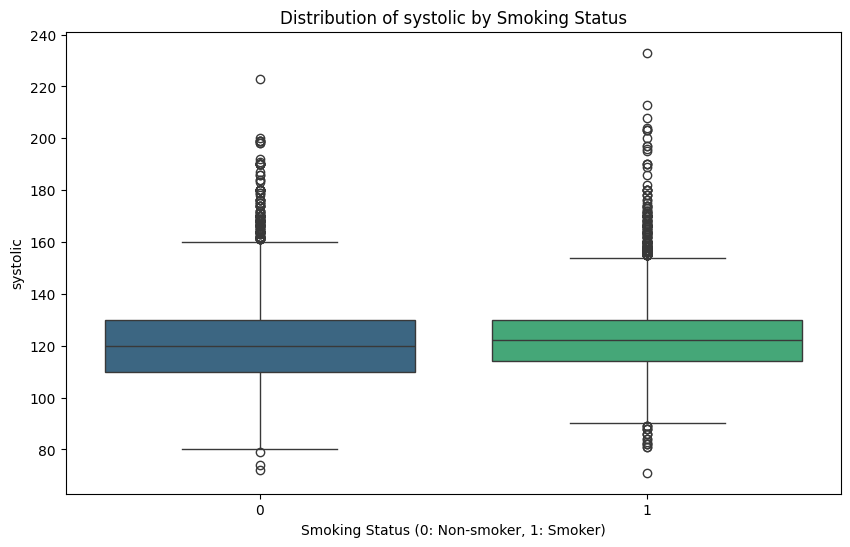

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


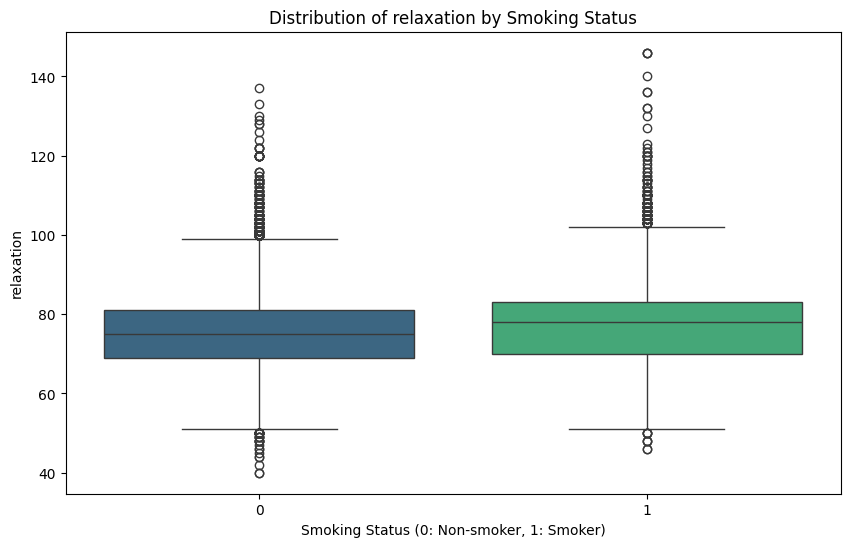

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


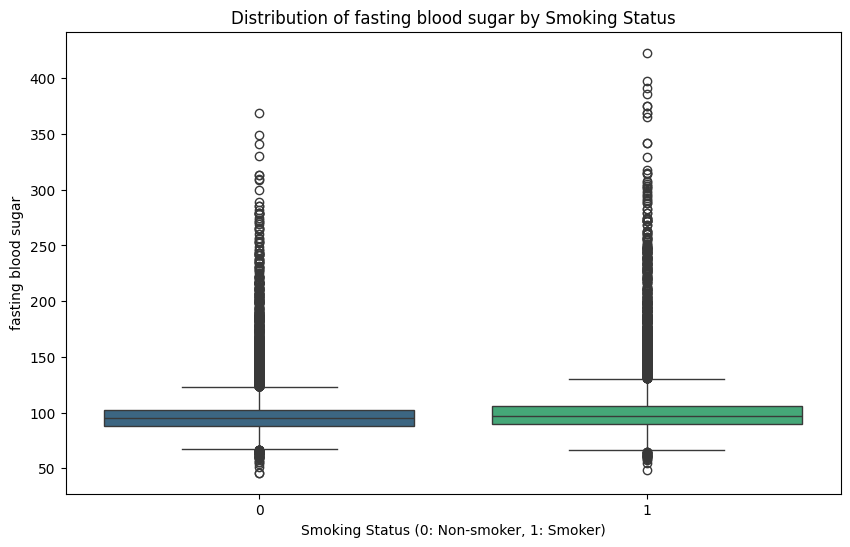

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


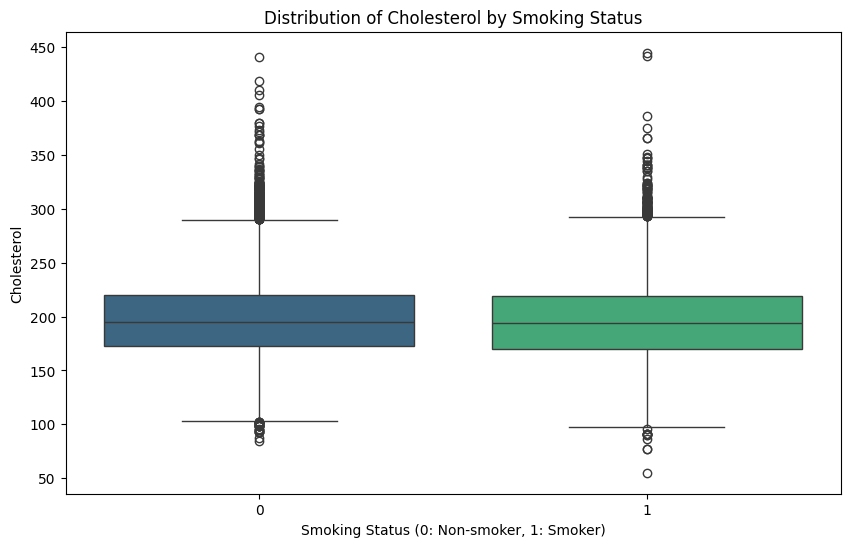

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


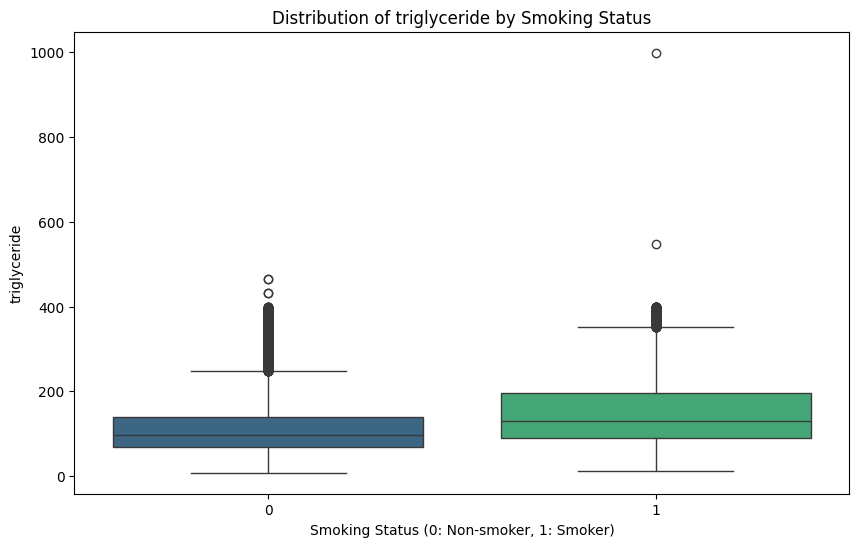

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


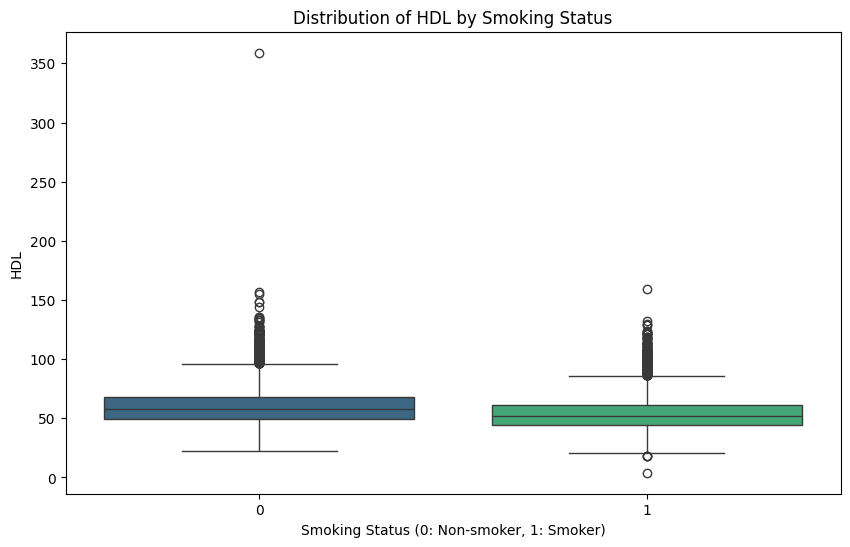

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


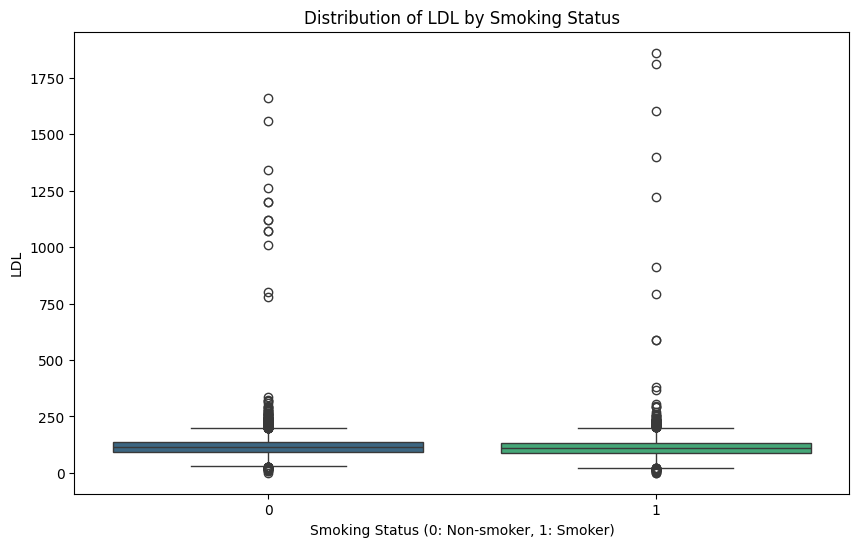

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


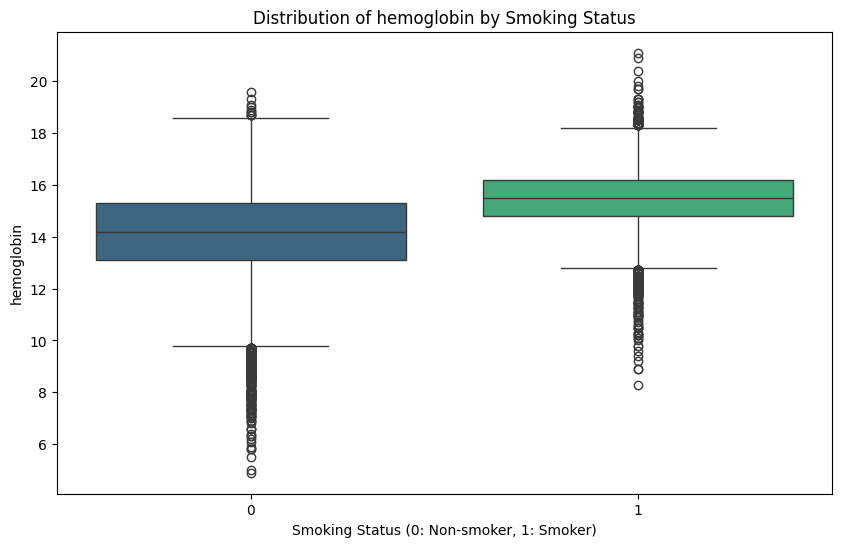

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


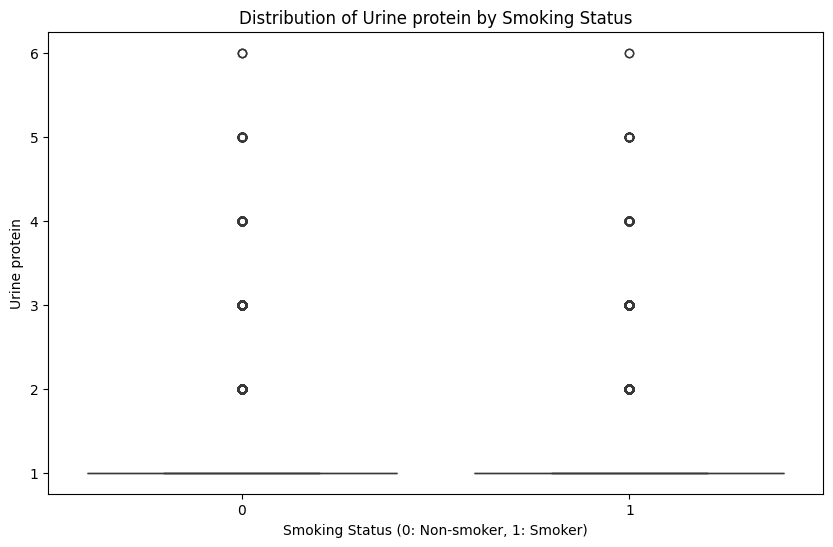

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


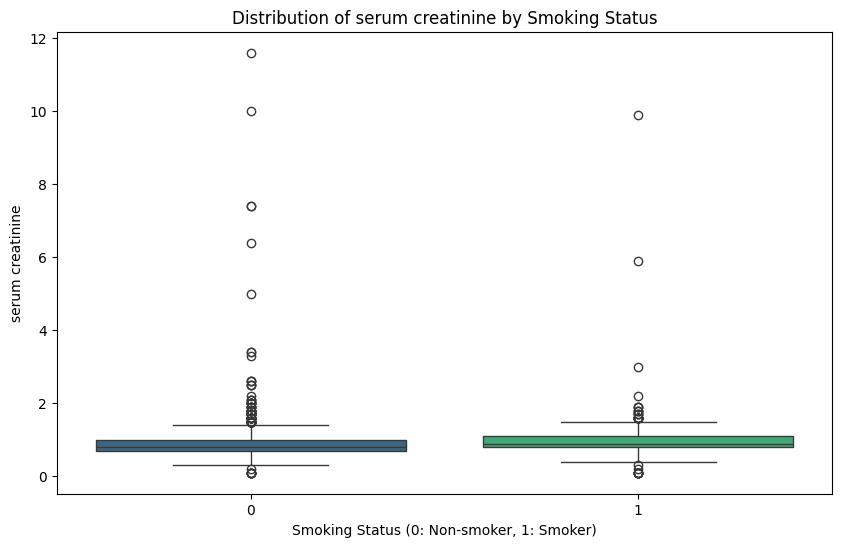

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


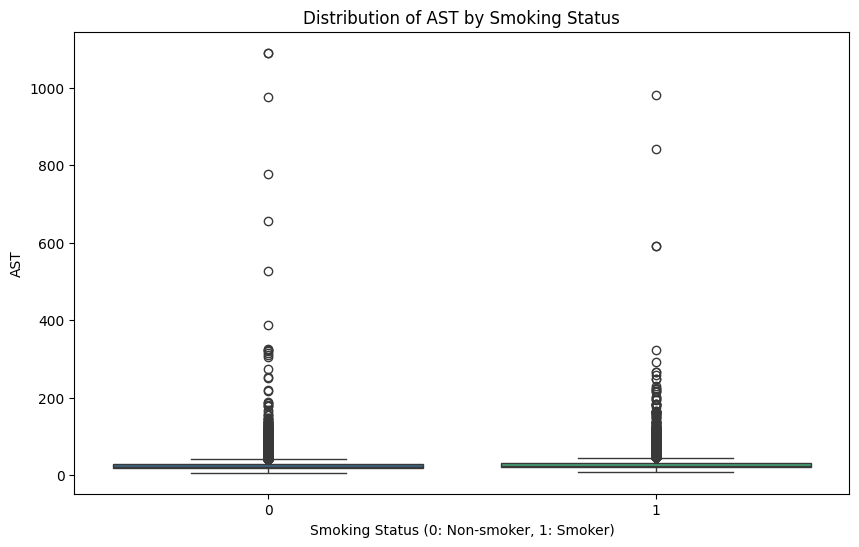

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


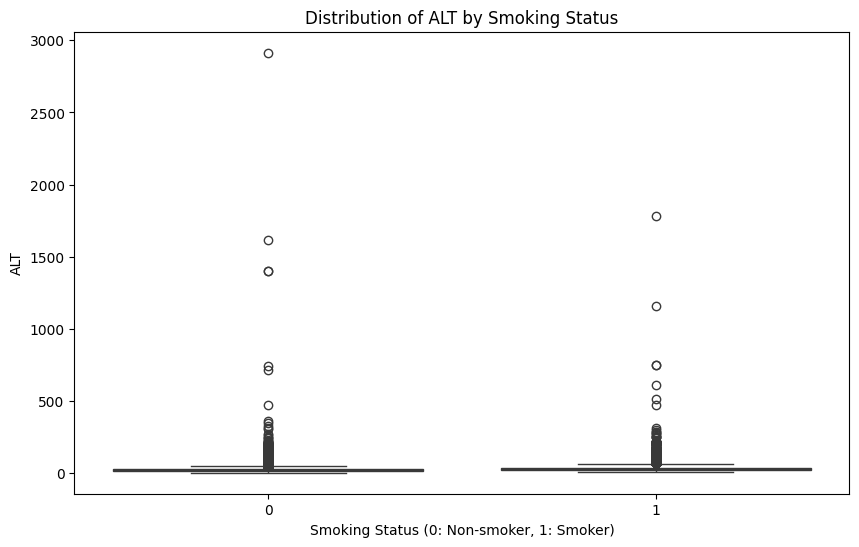

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


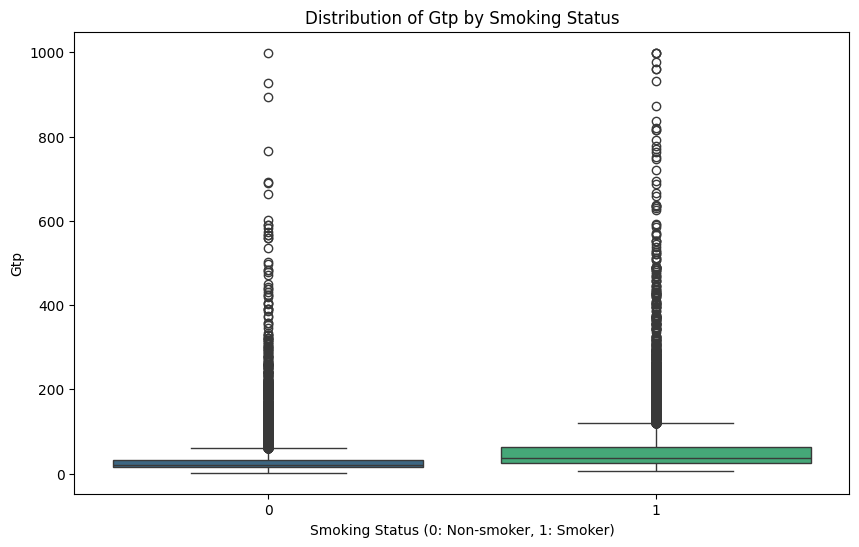

/tmp/ipython-input-107251786.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')


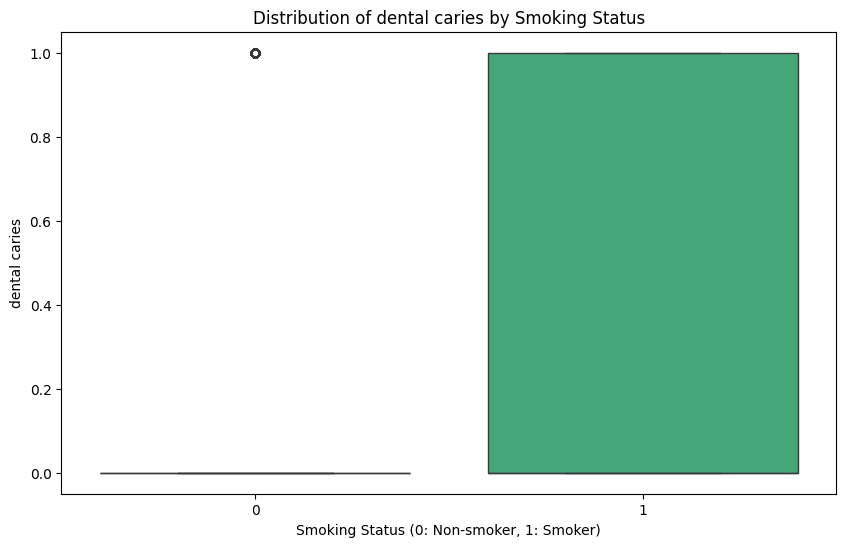

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.drop('smoking')

print("Generating box plots for numerical features vs. smoking status...")

for column in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis')
    plt.title(f'Distribution of {column} by Smoking Status')
    plt.xlabel('Smoking Status (0: Non-smoker, 1: Smoker)')
    plt.ylabel(column)
    plt.show()

Generating box plots for numerical features vs. smoking status...


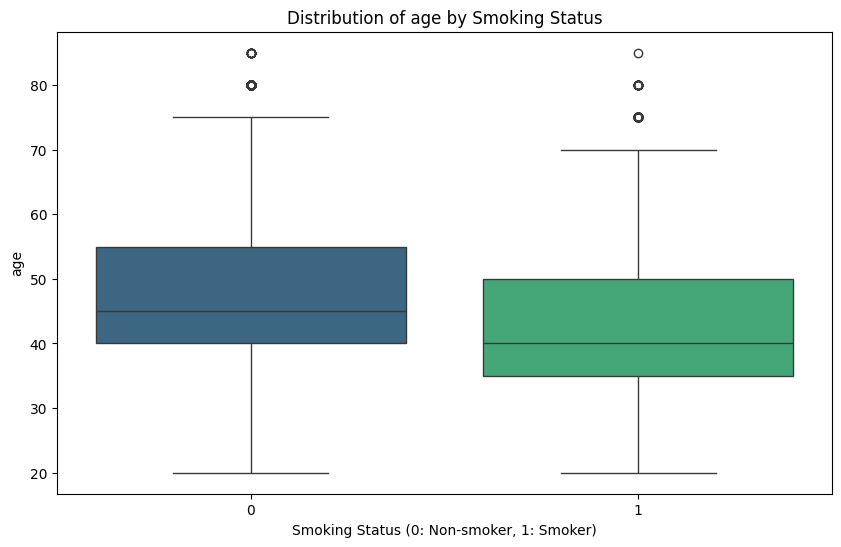

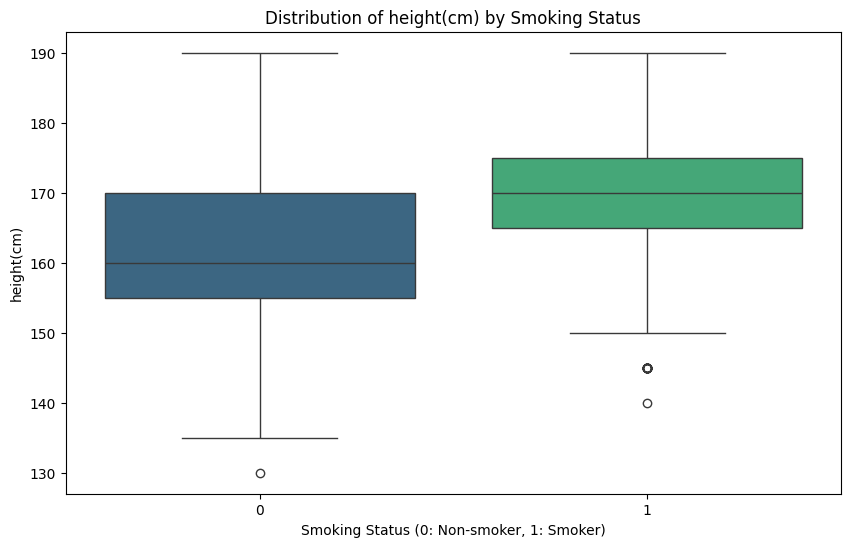

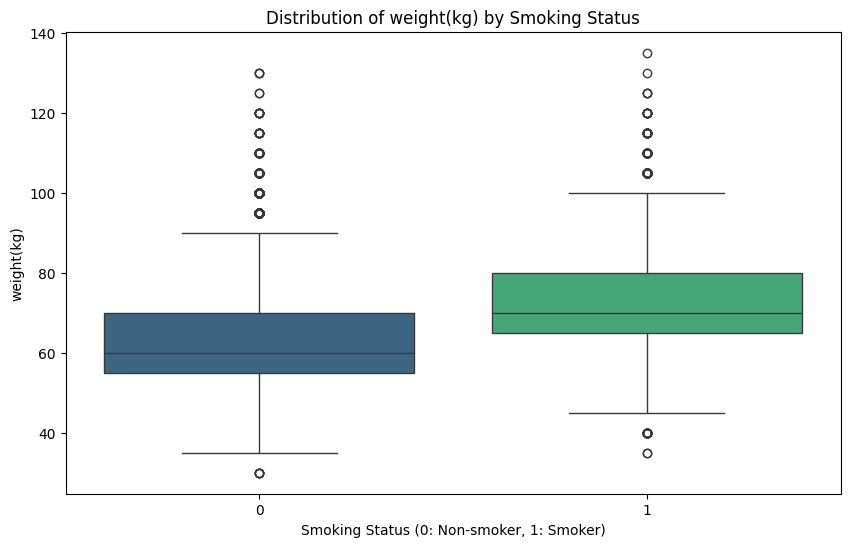

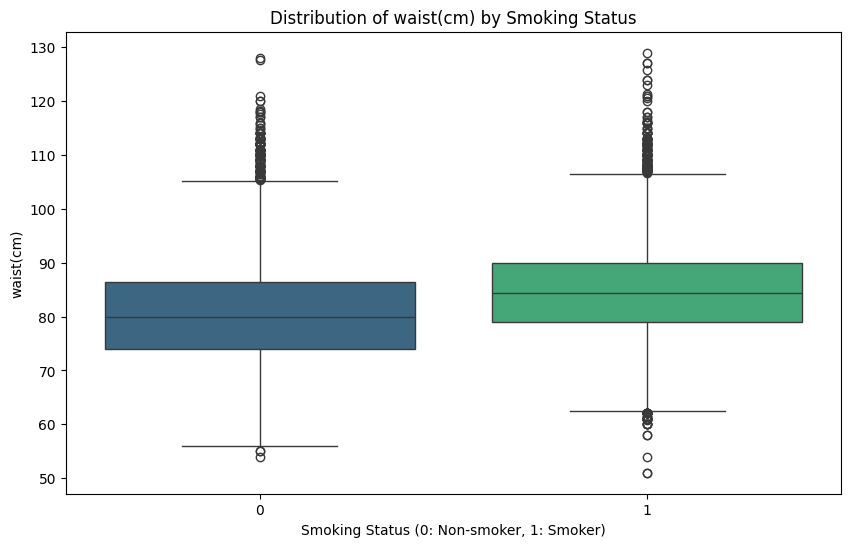

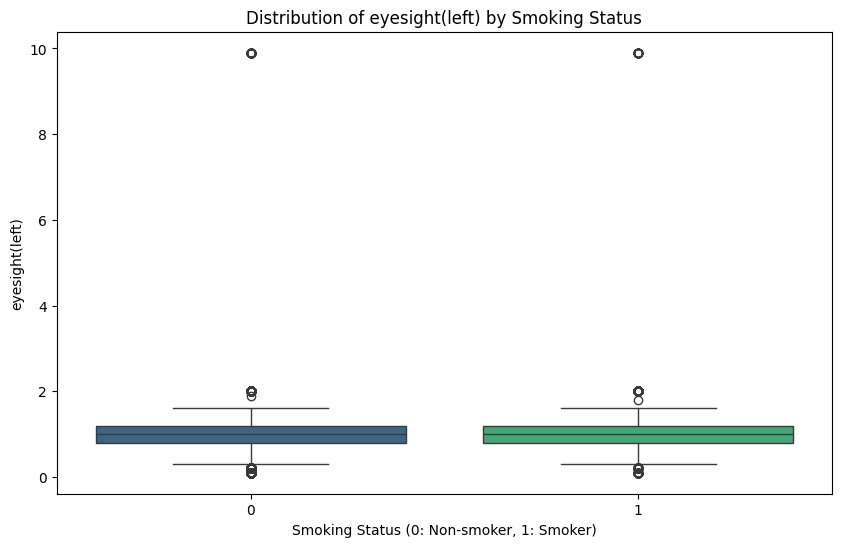

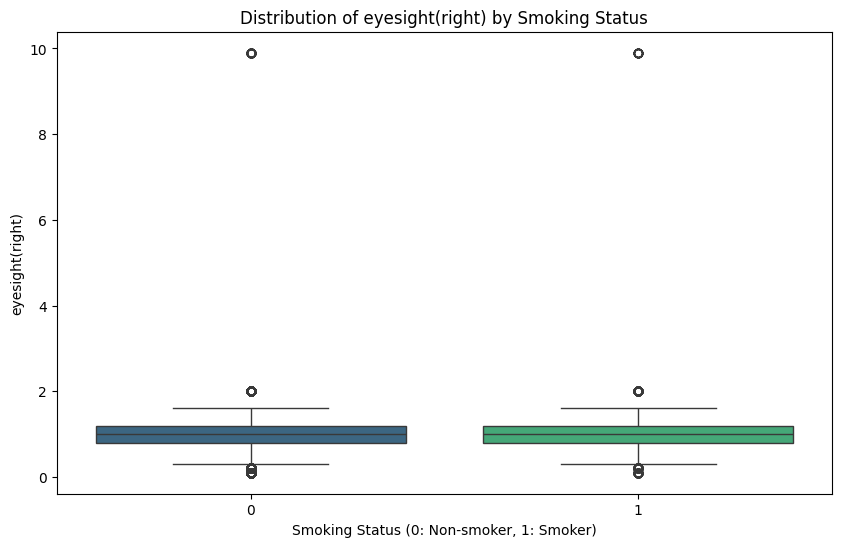

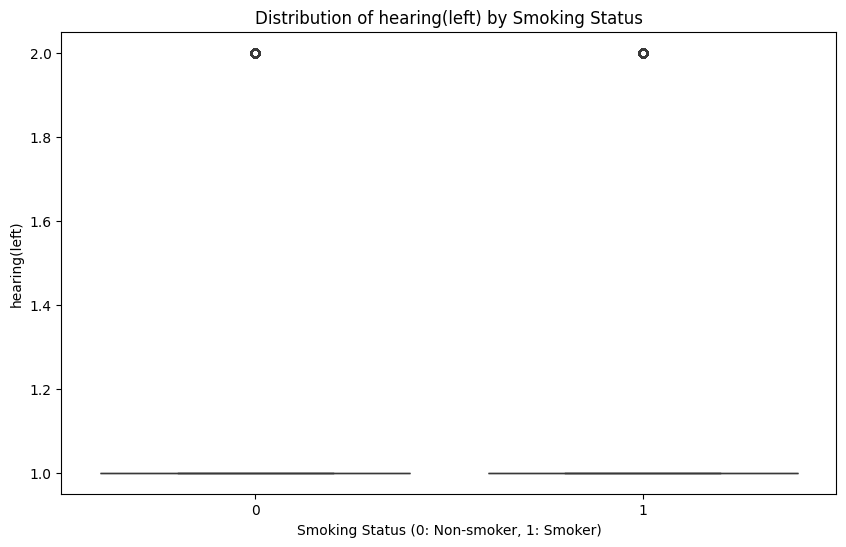

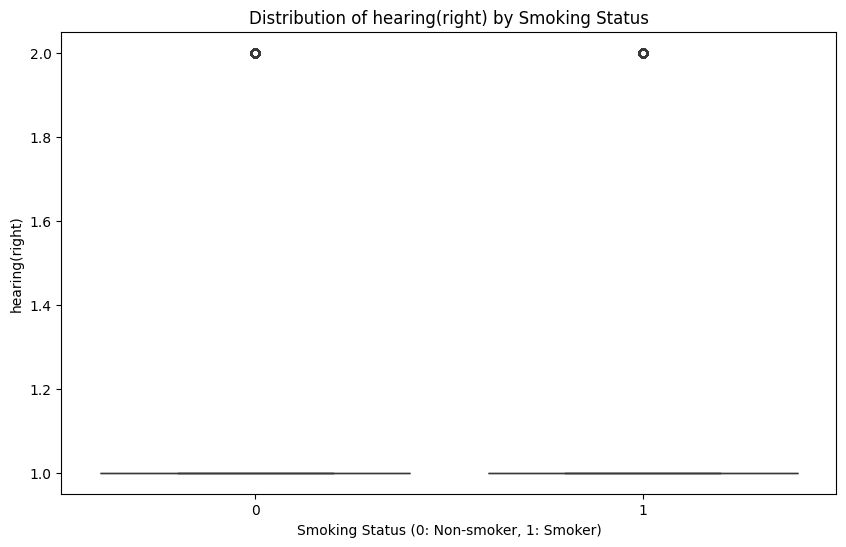

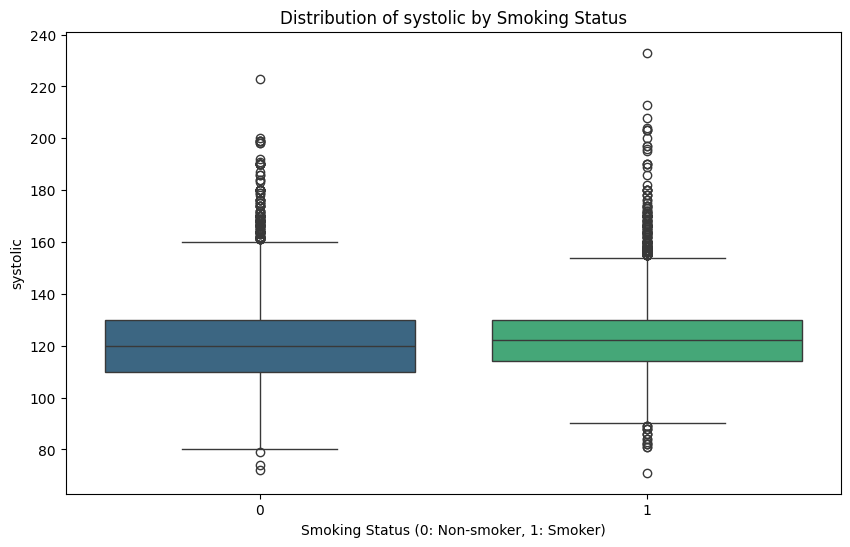

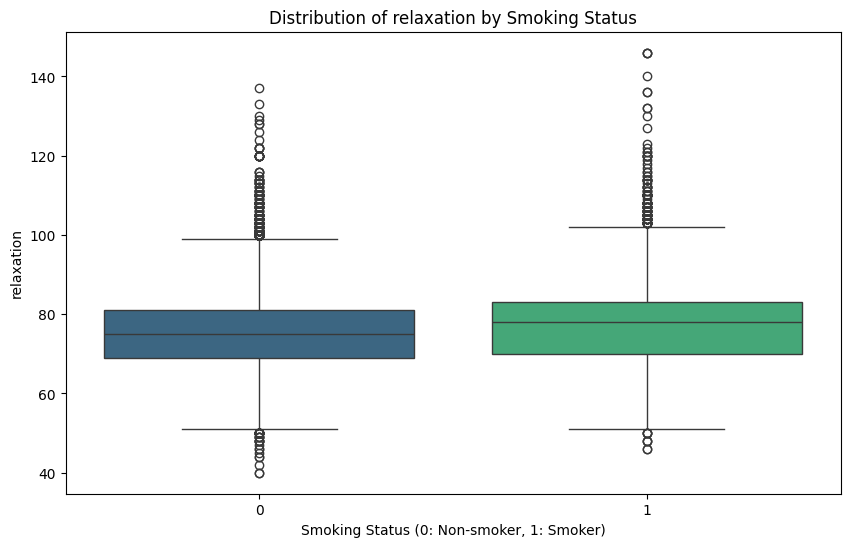

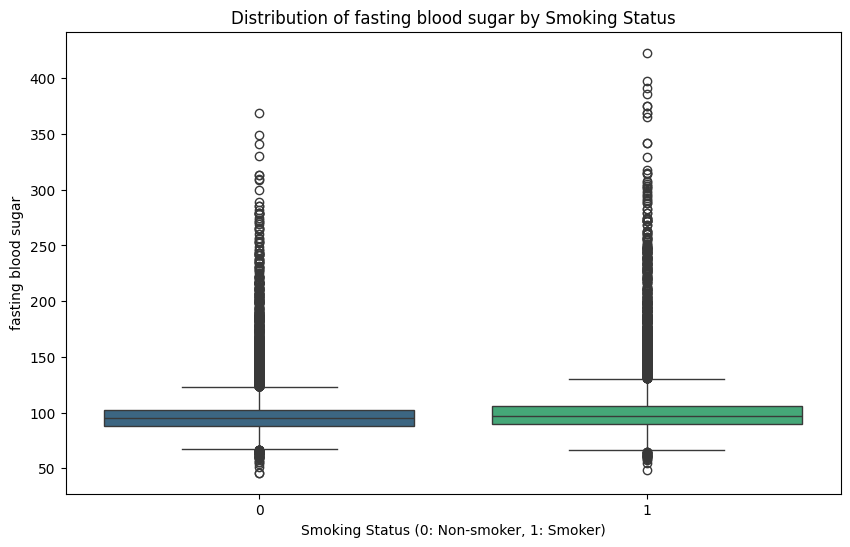

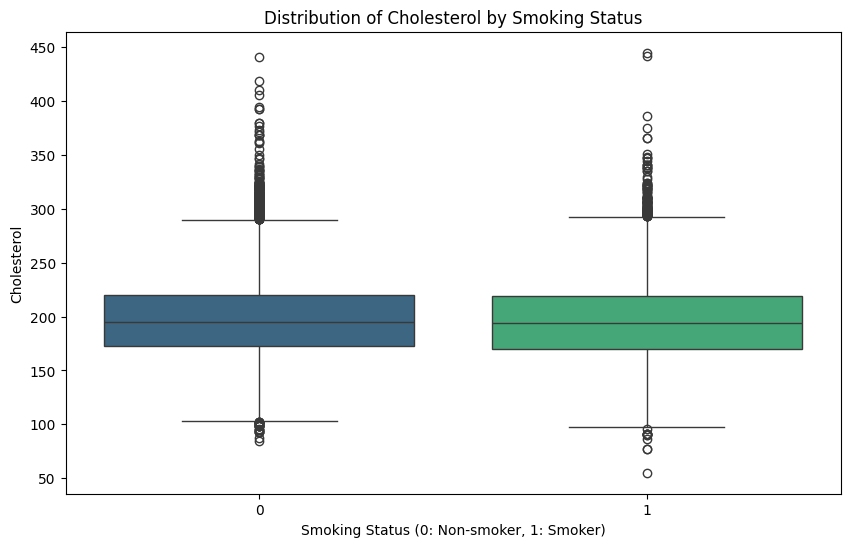

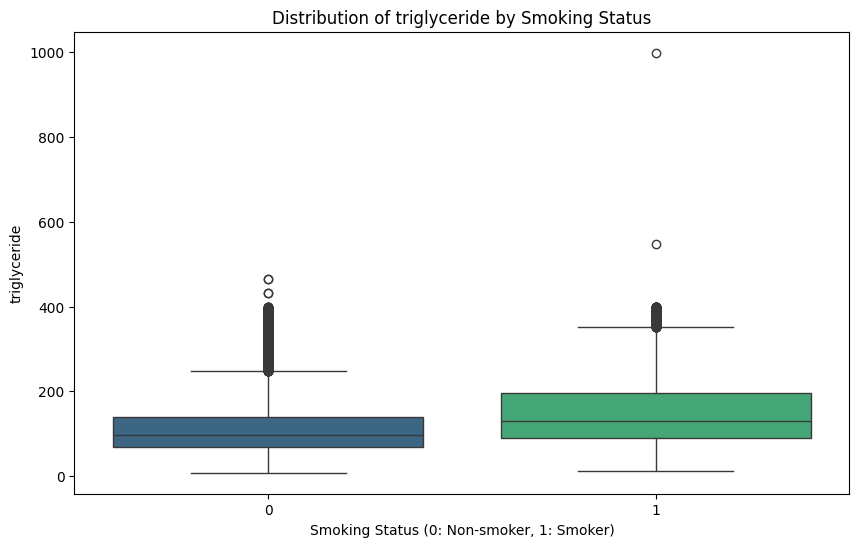

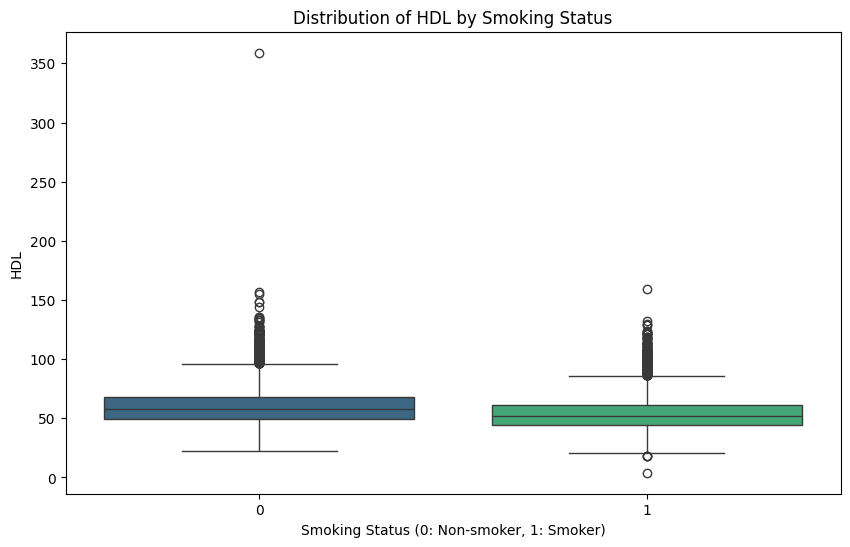

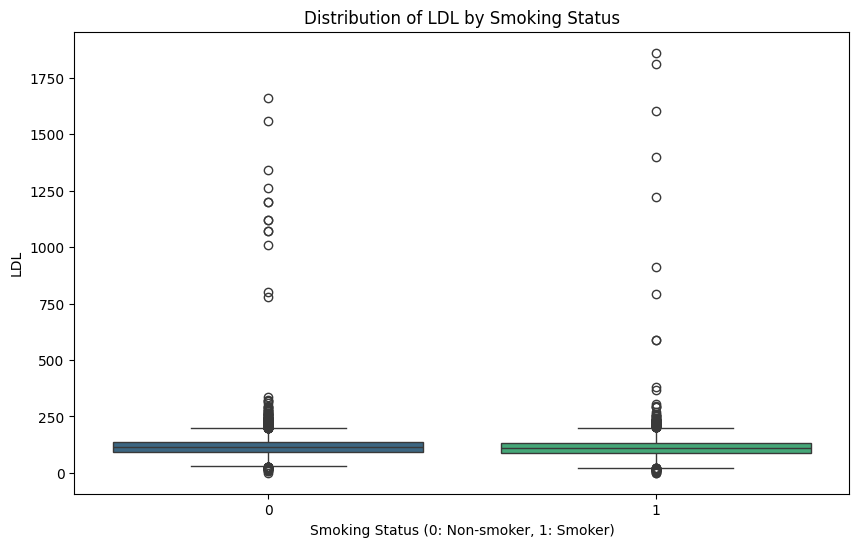

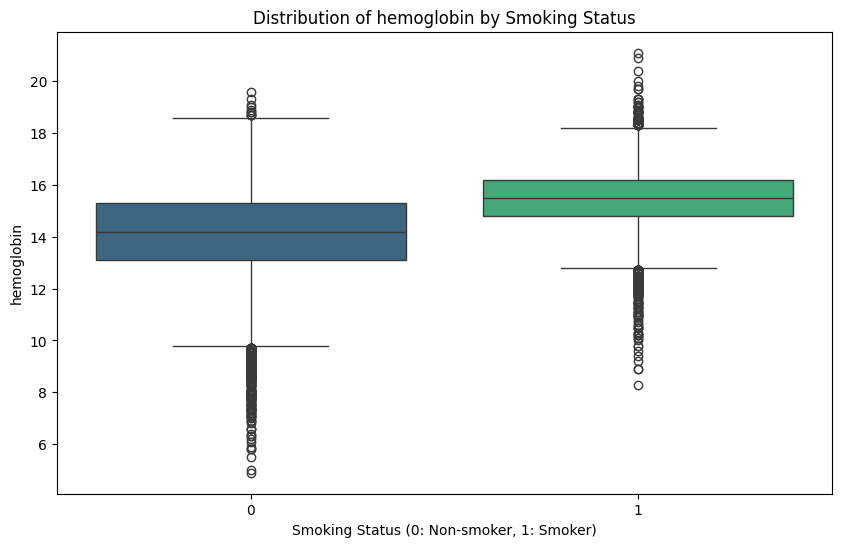

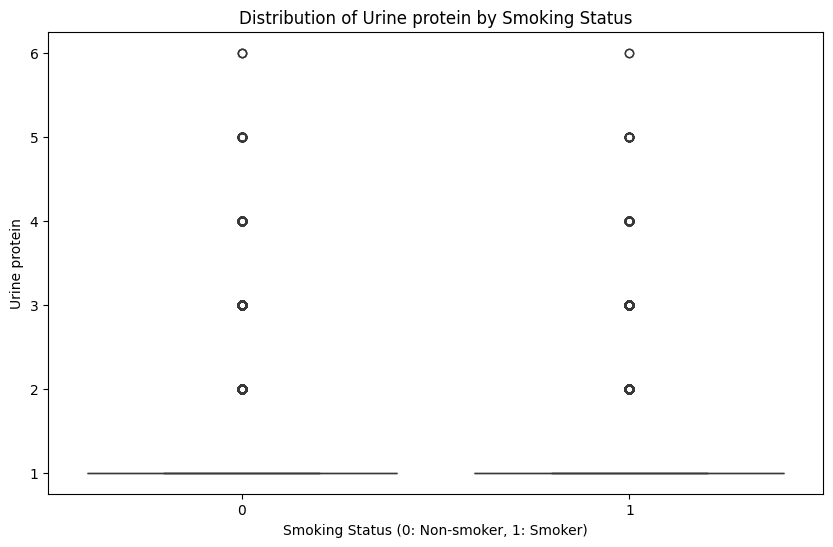

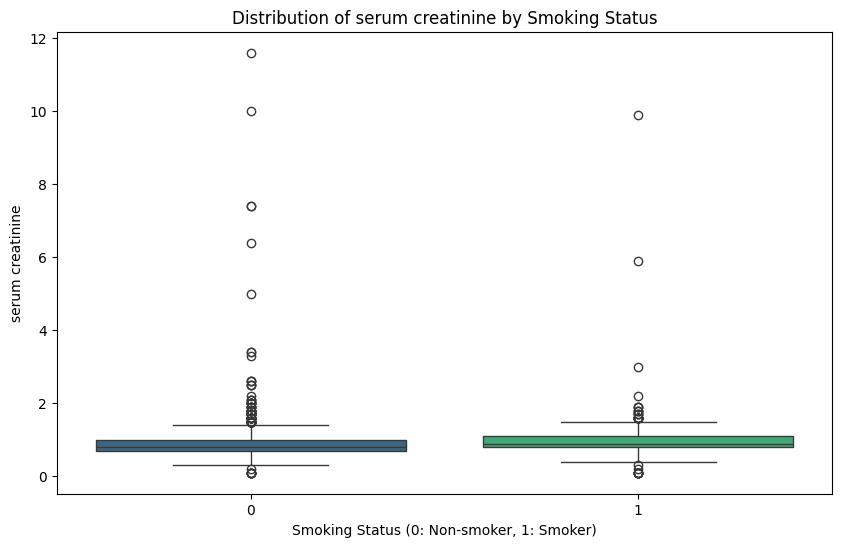

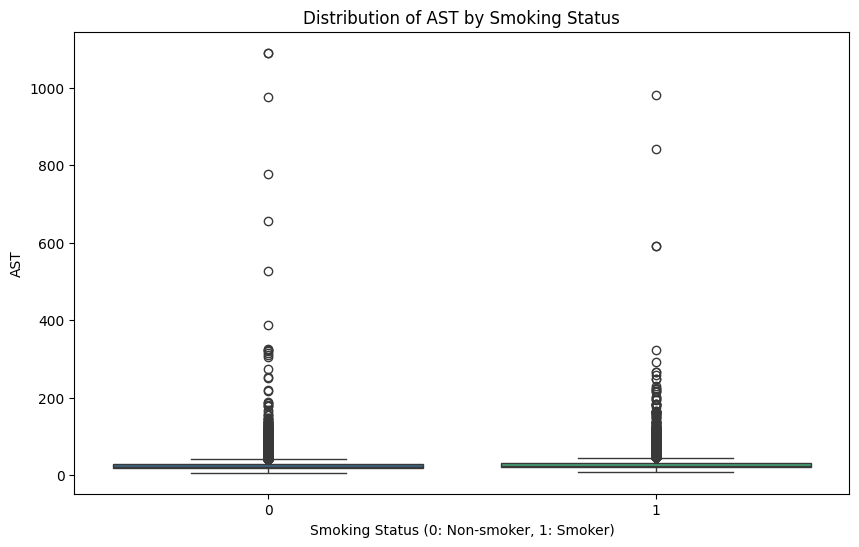

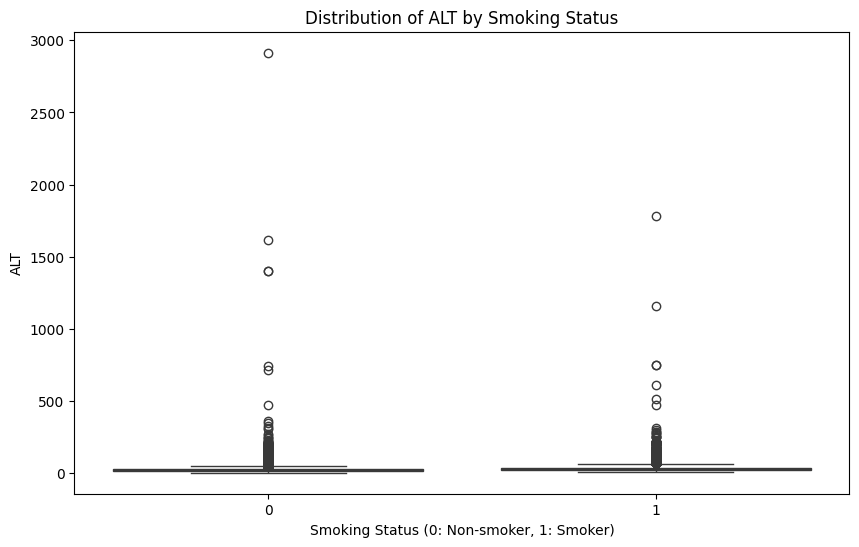

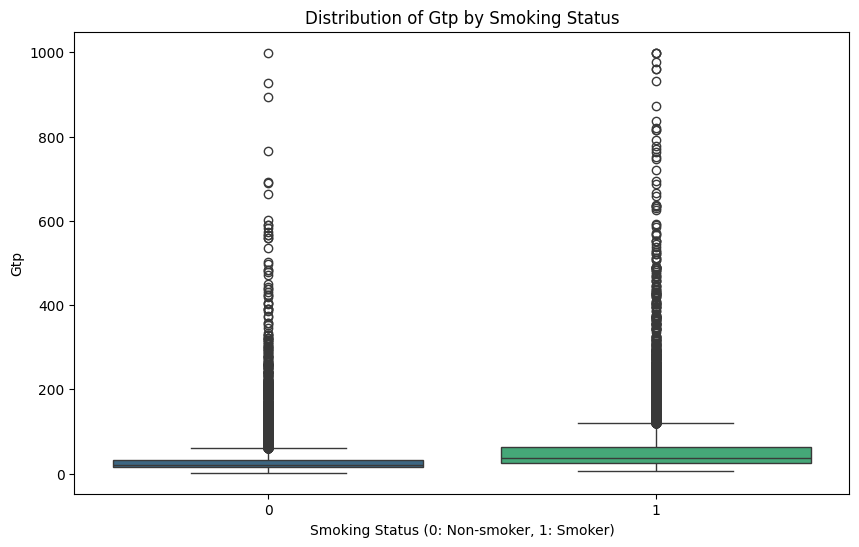

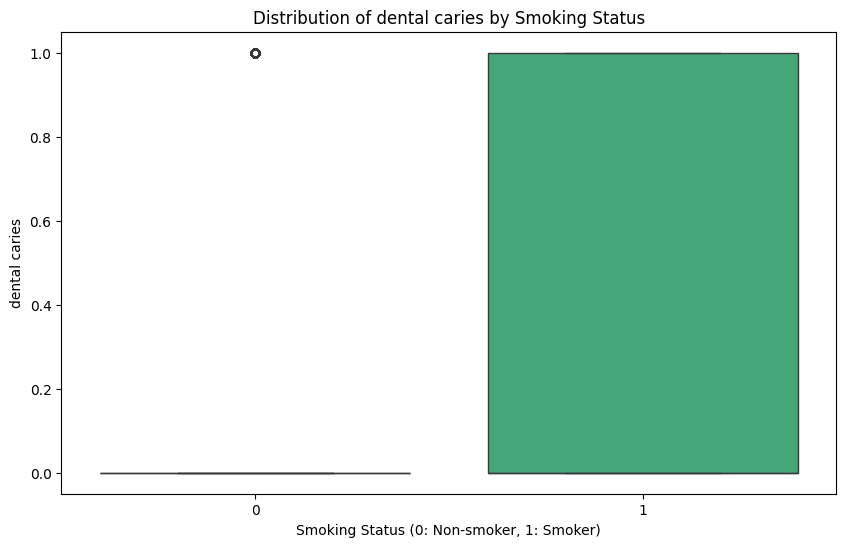

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.drop('smoking')

print("Generating box plots for numerical features vs. smoking status...")

for column in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='smoking', y=column, data=train_df, palette='viridis', hue='smoking', legend=False)
    plt.title(f'Distribution of {column} by Smoking Status')
    plt.xlabel('Smoking Status (0: Non-smoker, 1: Smoker)')
    plt.ylabel(column)
    plt.show()

Generating stacked bar plots for categorical features vs. smoking status...


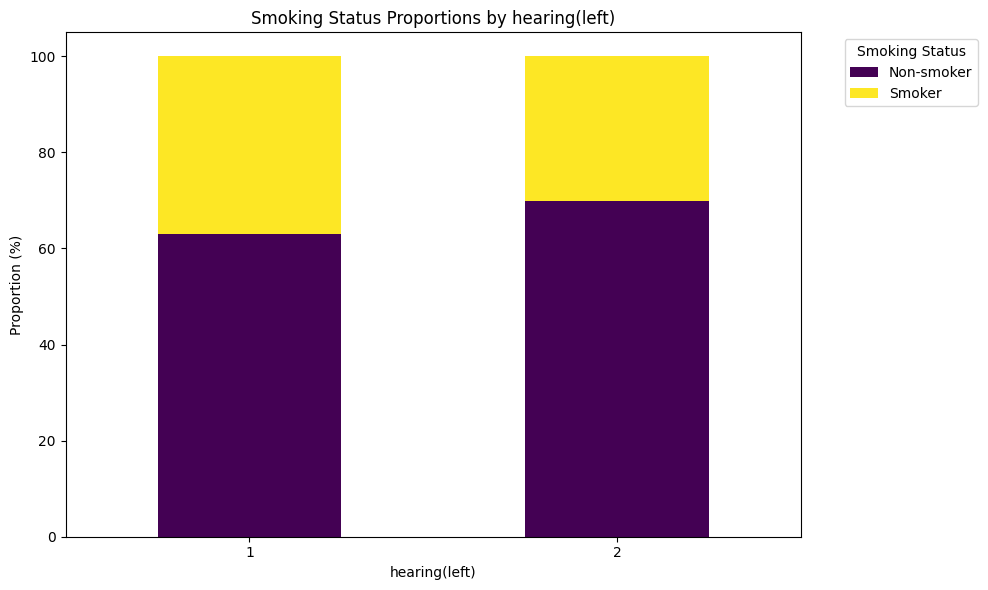

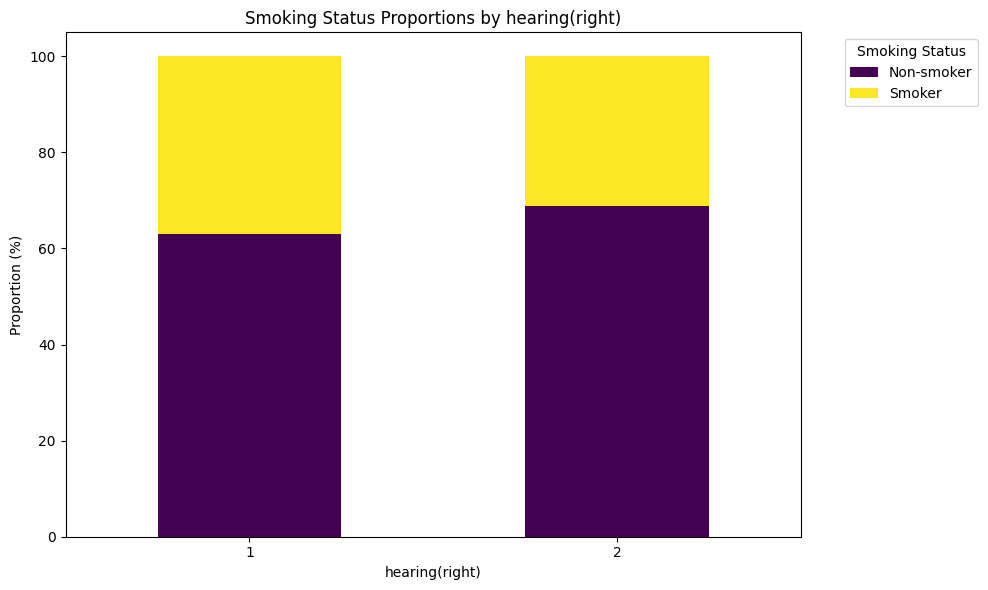

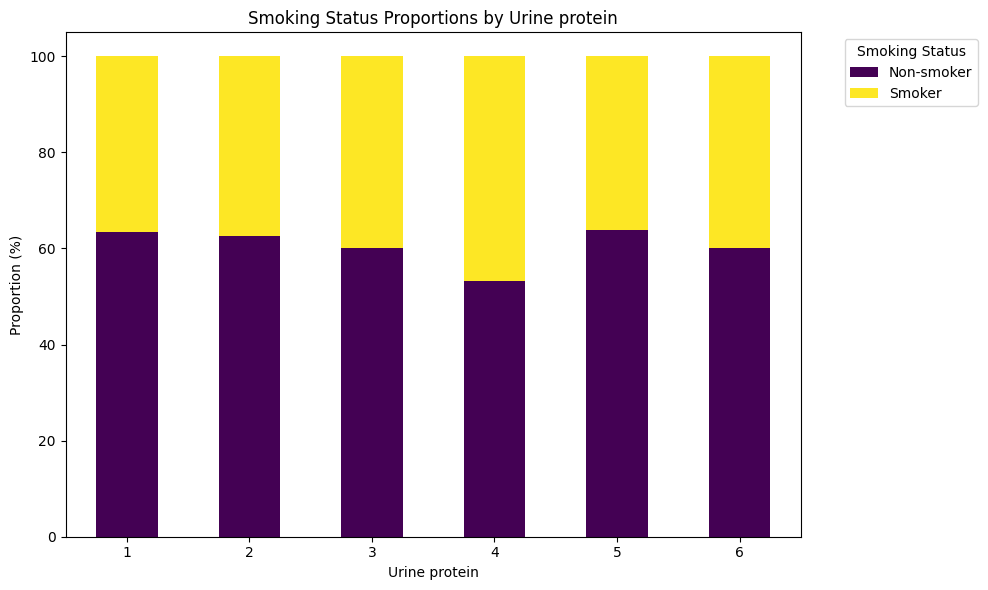

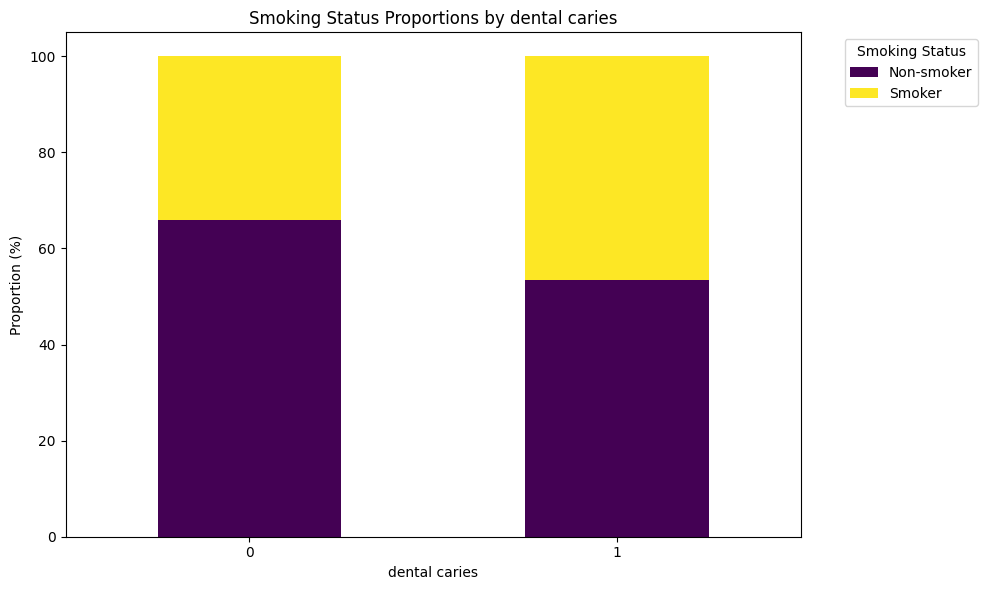

In [ ]:
print("Generating stacked bar plots for categorical features vs. smoking status...")

categorical_cols_encoded_for_bivariate = ['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries']

for column in categorical_cols_encoded_for_bivariate:

    proportions = pd.crosstab(train_df[column], train_df['smoking'], normalize='index') * 100

    plt.figure(figsize=(10, 6))
    proportions.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')
    plt.title(f'Smoking Status Proportions by {column}')
    plt.xlabel(column)
    plt.ylabel('Proportion (%)')
    plt.xticks(rotation=0) # Keep x-axis labels horizontal for readability

    # Add a custom legend
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['Non-smoker', 'Smoker'], title='Smoking Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

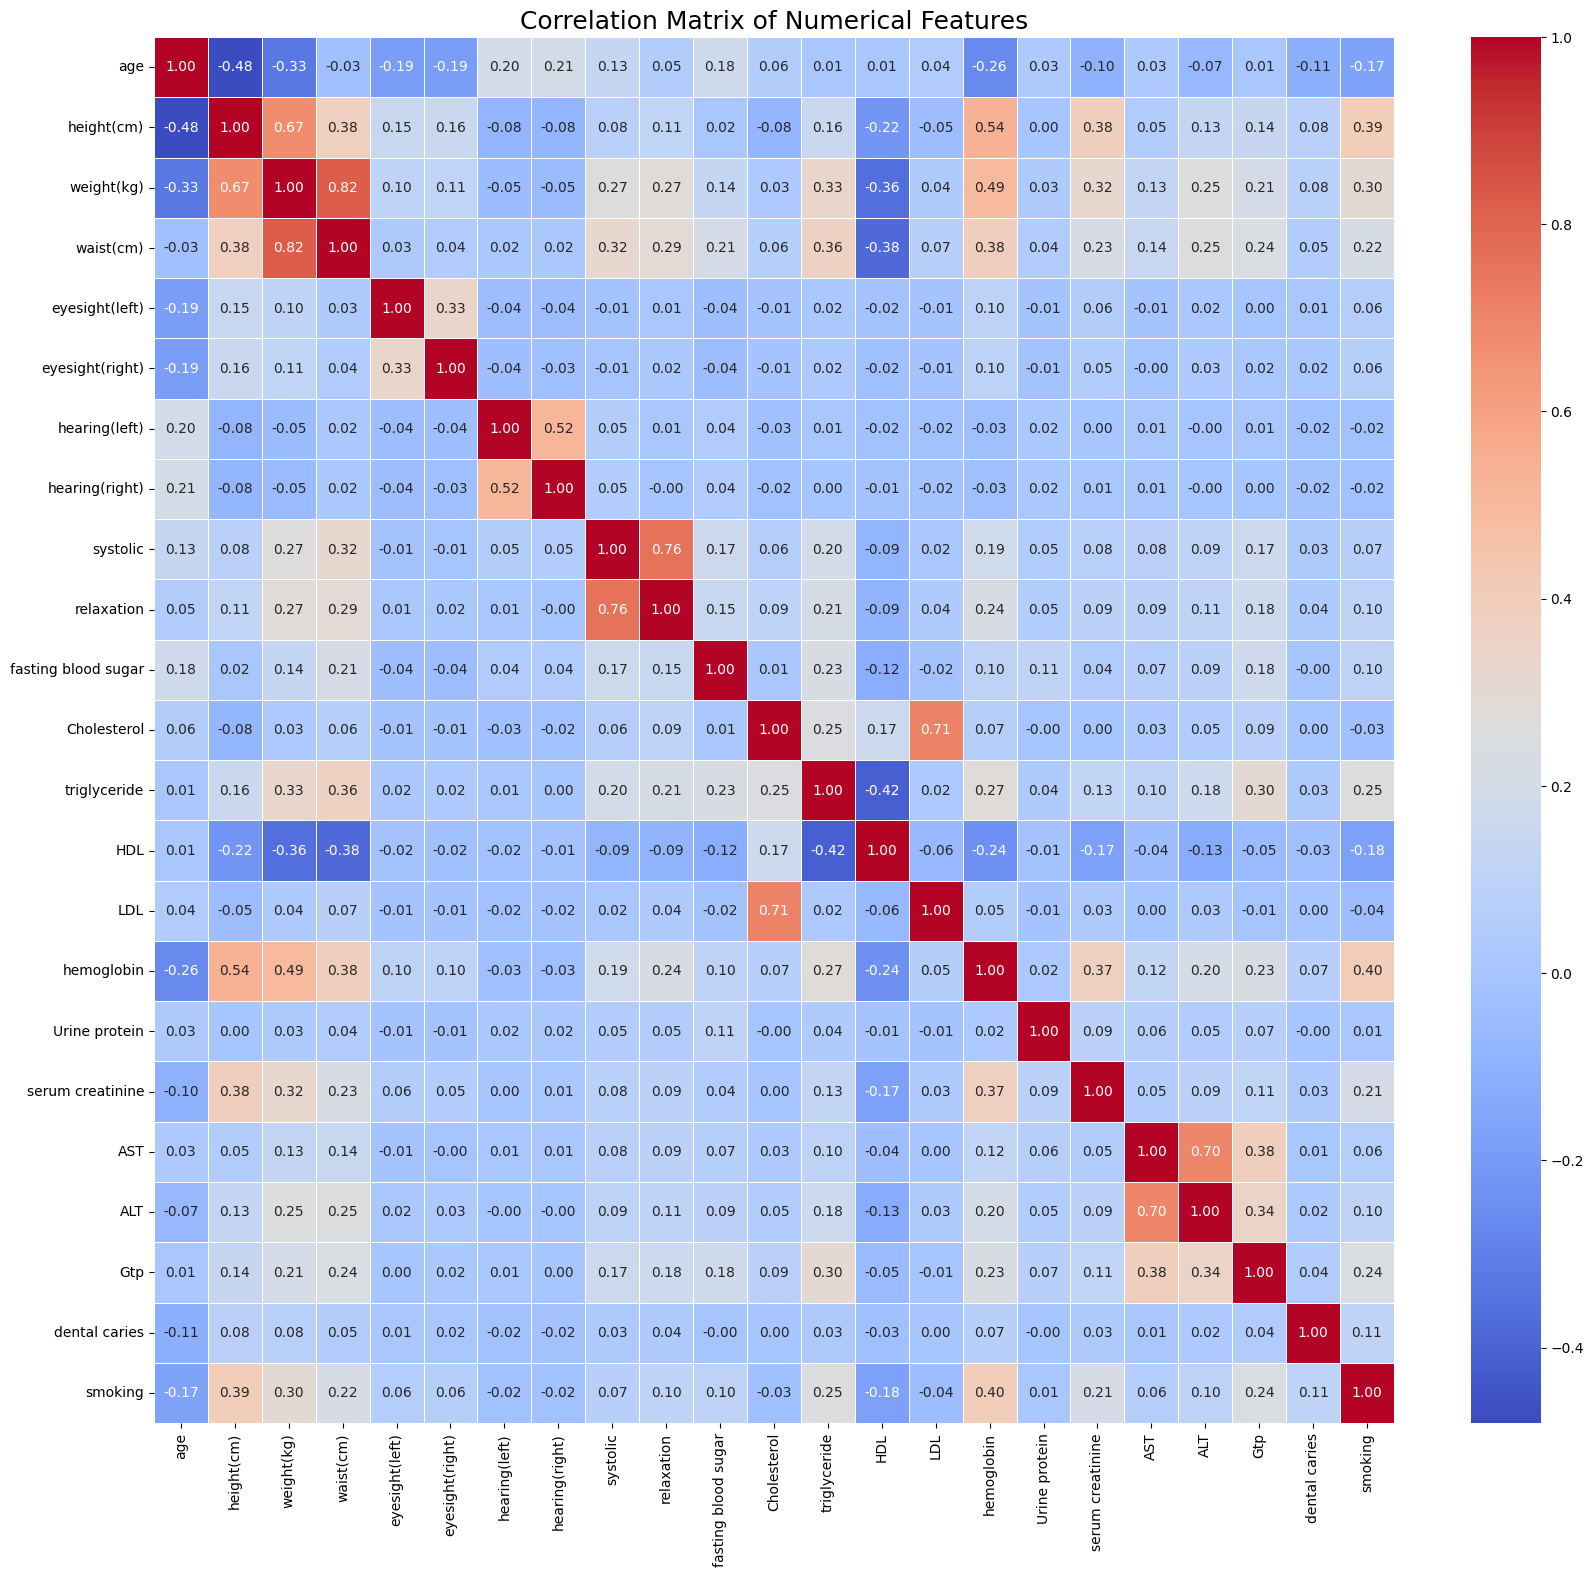

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation calculation
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = train_df[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add a title to the heatmap
plt.title('Correlation Matrix of Numerical Features', fontsize=18)

# Display the plot
plt.show()

In [ ]:
# ================================================================
#  SUPPORT VECTOR CLASSIFIER (SVC)
# ================================================================
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': [ 'rbf'],
    'gamma': ['scale'],
    'class_weight': ['balanced']
}

svc = SVC(random_state=42)
svc_grid_search = GridSearchCV(svc, svm_param_grid, cv=5, scoring='f1', n_jobs=-1)
svc_grid_search.fit(X_train_s, y_train)

print("Best SVC Params:", svc_grid_search.best_params_)

pred_svc = svc_grid_search.predict(X_test_s)
evaluate_model("SVC (GridSearchCV)", y_test, pred_svc)

Best SVC Params: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}

===================== SVC (GridSearchCV) =====================
Accuracy : 0.7143773246120303
Precision: 0.5721404303510759
F1 Score : 0.69405138068416
Confusion Matrix:
 [[3044 1889]
 [ 338 2526]]


In [ ]:
# ================================================================
#  LOGISTIC REGRESSION (with GridSearchCV)
# ================================================================
log_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1','l2'],
    'solver': ['liblinear','lbfgs'],
    'class_weight': ['balanced']
}

log_grid_search = GridSearchCV(LogisticRegression(max_iter=1000), log_param_grid, cv=5, scoring='f1', n_jobs=-1)
log_grid_search.fit(X_train_s, y_train)

print("Best Logistic Regression Params:", log_grid_search.best_params_)

pred_log = log_grid_search.predict(X_test_s)
evaluate_model("Logistic Regression (GridSearchCV)", y_test, pred_log)

Best Logistic Regression Params: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

===================== Logistic Regression (GridSearchCV) =====================
Accuracy : 0.7092471463383353
Precision: 0.5763622409823485
F1 Score : 0.6652886460947881
Confusion Matrix:
 [[3277 1656]
 [ 611 2253]]


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

In [ ]:
# Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# scaled data for MLP
X_train_nn = X_train_s
X_test_nn = X_test_s

# Improved Base Model
mlp = MLPClassifier(
    max_iter=300,
    early_stopping=True,
    n_iter_no_change=10,
    random_state=42,
    validation_fraction=0.1
)

# hyperparameters to tune for MLP
param_dist = {
    'hidden_layer_sizes': [
        (32,), (64,), (128,),
        (64, 32), (128, 64)
    ],
    'activation': ['relu', 'tanh'],
    'alpha': np.logspace(-5, -1, 5),
    'learning_rate_init': np.logspace(-4, -2, 3),
    'batch_size': [16, 32, 64, 128],
    'learning_rate': ['constant', 'adaptive'],
    'solver': ['adam']
}

# Randomized Search
mlp_random = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist,
    n_iter=20,                 # try 20 combinations
    cv=3,                      # reduce to 3-fold → faster
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit
mlp_random.fit(X_train_nn, y_train)

print("\nBest MLP Params (RandomSearch):")
print(mlp_random.best_params_)

# Predict
pred_mlp = mlp_random.predict(X_test_nn)

# Evaluate
evaluate_model("Neural Network (Improved RandomizedSearchCV)", y_test, pred_mlp)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best MLP Params (RandomSearch):
{'solver': 'adam', 'learning_rate_init': np.float64(0.001), 'learning_rate': 'constant', 'hidden_layer_sizes': (64, 32), 'batch_size': 64, 'alpha': np.float64(0.01), 'activation': 'relu'}

===================== Neural Network (Improved RandomizedSearchCV) =====================
Accuracy : 0.749134282416314
Precision: 0.6599718111346018
F1 Score : 0.6569624693090144
Confusion Matrix:
 [[3968  965]
 [ 991 1873]]


In [ ]:
# ================================================================
# K-MEANS CLUSTERING
# ================================================================
from sklearn.cluster import KMeans

print("\n===================== K-Means Clustering ====================")

# Train K-Means on training data
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train_s)

# Predictions for train & test
pred_kmeans_train = kmeans.predict(X_train)
pred_kmeans_test = kmeans.predict(X_test)

print("Example cluster assignments (first 10 test samples):", pred_kmeans_test[:10])

# ================================================================
# MAP CLUSTERS → TRUE LABELS USING MAJORITY VOTING
# ================================================================
cluster_to_label = {}

for cluster_id in np.unique(pred_kmeans_train):
    # Get indices of samples in each cluster
    indices = np.where(pred_kmeans_train == cluster_id)
    # Assign the major label from true labels in y_train
    majority_label = y_train.iloc[indices].mode()[0]
    cluster_to_label[cluster_id] = majority_label

# Map K-Means predictions to real class labels
mapped_pred_kmeans_test = np.vectorize(cluster_to_label.get)(pred_kmeans_test)

# ================================================================
# Evaluate K-Means as a classifier
# ================================================================
print("\n===================== K-Means Classification Metrics ====================")
print("Accuracy :", accuracy_score(y_test, mapped_pred_kmeans_test))
print("Precision:", precision_score(y_test, mapped_pred_kmeans_test))
print("F1 Score :", f1_score(y_test, mapped_pred_kmeans_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, mapped_pred_kmeans_test))


===================== K-Means Clustering ====================
Example cluster assignments (first 10 test samples): [0 0 0 0 0 0 0 0 0 0]

===================== K-Means Classification Metrics ====================
Accuracy : 0.6326792356034372
Precision: 0.0
F1 Score : 0.0
Confusion Matrix:
 [[4933    0]
 [2864    0]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import numpy as np

print("\n===================== DBSCAN Hyperparameter Tuning =====================")

# Hyperparameter ranges to try
eps_values = [0.3, 0.5, 0.7, 1.0, 1.2]
min_samples_values = [3, 5, 10, 15]

best_f1 = -1
best_params = None
best_pred = None

# Loop over all hyperparameter combinations
for eps in eps_values:
    for min_s in min_samples_values:

        db = DBSCAN(eps=eps, min_samples=min_s)
        cluster_labels = db.fit_predict(X_train_s)

        # If DBSCAN labels all points as noise → skip
        if len(np.unique(cluster_labels)) <= 1:
            continue

        # Map clusters → actual class (majority voting)
        mapping = {}
        for cluster_id in np.unique(cluster_labels):
            idx = np.where(cluster_labels == cluster_id)
            majority = y_train.iloc[idx].mode()[0]
            mapping[cluster_id] = majority

        # Predict on test set
        test_clusters = db.fit_predict(X_test_s)

        # Assign cluster labels to test set
        mapped_pred_test = np.array([
            mapping.get(cl, 0) for cl in test_clusters  # map noise (-1) to majority class 0
        ])

        # Compute metrics
        acc = accuracy_score(y_test, mapped_pred_test)
        prec = precision_score(y_test, mapped_pred_test)
        f1 = f1_score(y_test, mapped_pred_test)

        print(f"eps={eps}, min_samples={min_s} --> Accuracy={acc:.4f}, F1={f1:.4f}")

        # Find best model (maximize F1)
        if f1 > best_f1:
            best_f1 = f1
            best_params = (eps, min_s)
            best_pred = mapped_pred_test

# ================================================================
# Print Best DBSCAN Result
# ================================================================
eps_best, min_s_best = best_params

print("\n===================== BEST DBSCAN MODEL =====================")
print(f"Best eps: {eps_best}")
print(f"Best min_samples: {min_s_best}")
print(f"Best F1 Score: {best_f1:.4f}")

print("\nConfusion Matrix for best DBSCAN:")
print(confusion_matrix(y_test, best_pred))

print("\nAccuracy :", accuracy_score(y_test, best_pred))
print("Precision:", precision_score(y_test, best_pred))
print("F1 Score :", f1_score(y_test, best_pred))


===================== DBSCAN Hyperparameter Tuning =====================


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


eps=1.0, min_samples=3 --> Accuracy=0.6327, F1=0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


eps=1.0, min_samples=5 --> Accuracy=0.6327, F1=0.0000
eps=1.2, min_samples=3 --> Accuracy=0.6313, F1=0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


eps=1.2, min_samples=5 --> Accuracy=0.6327, F1=0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


eps=1.2, min_samples=10 --> Accuracy=0.6327, F1=0.0000
eps=1.2, min_samples=15 --> Accuracy=0.6327, F1=0.0000

===================== BEST DBSCAN MODEL =====================
Best eps: 1.0
Best min_samples: 3
Best F1 Score: 0.0000

Confusion Matrix for best DBSCAN:
[[4933    0]
 [2864    0]]

Accuracy : 0.6326792356034372
Precision: 0.0
F1 Score : 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
# ================================================================
#  DECISION TREE CLASSIFIER (with GridSearchCV)
# ================================================================

dt_param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
dt_grid_search.fit(X_train, y_train)

print("Best Decision Tree Params:", dt_grid_search.best_params_)

pred_dt = dt_grid_search.predict(X_test)
evaluate_model("Decision Tree (GridSearchCV)", y_test, pred_dt)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Decision Tree Params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

===================== Decision Tree (GridSearchCV) =====================
Accuracy : 0.6880851609593434
Precision: 0.5479148181011535
F1 Score : 0.6701030927835051
Confusion Matrix:
 [[2895 2038]
 [ 394 2470]]


In [5]:
# ================================================================
#  RANDOM FOREST CLASSIFIER (with GridSearchCV)
# ================================================================

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

print("Best Random Forest Params:", rf_grid_search.best_params_)

pred_rf = rf_grid_search.predict(X_test)
evaluate_model("Random Forest (GridSearchCV)", y_test, pred_rf)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Random Forest Params: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}

===================== Random Forest (GridSearchCV) =====================
Accuracy : 0.7978709760164165
Precision: 0.7122610415293342
F1 Score : 0.7327907765344185
Confusion Matrix:
 [[4060  873]
 [ 703 2161]]


In [6]:
# ================================================================
#  XGBOOST CLASSIFIER (with RandomizedSearchCV)
# ================================================================

import xgboost as xgb # Ensure XGBoost is imported
from sklearn.model_selection import RandomizedSearchCV # New import for RandomizedSearchCV

# Calculate scale_pos_weight to handle imbalanced classes
scale_pos_weight_value = (len(y_train) - y_train.sum()) / y_train.sum()

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [1, scale_pos_weight_value] # Use the pre-calculated value
}

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_random_search = RandomizedSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='f1', n_iter=20, n_jobs=-1, verbose=1, random_state=42)
xgb_random_search.fit(X_train_s, y_train)

print("Best XGBoost Params (RandomizedSearchCV): {}".format(xgb_random_search.best_params_))

pred_xgb = xgb_random_search.predict(X_test_s)
evaluate_model("XGBoost (RandomizedSearchCV)", y_test, pred_xgb)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:25:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Params (RandomizedSearchCV): {'subsample': 0.8, 'scale_pos_weight': np.float64(1.7228042605203422), 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.9}

===================== XGBoost (RandomizedSearchCV) =====================
Accuracy : 0.7765807361805823
Precision: 0.6653891509433962
F1 Score : 0.7215473145780051
Confusion Matrix:
 [[3798 1135]
 [ 607 2257]]
